# Data Set Cleaning
## 95-791 Data Mining (Fall 2021) 
### Group Member Name: Aishwarya Kura,Fatima Barragan Herrera,Jaison Jose


### Topics covered:
- 1. Reading and Cleaning Dataset
- 2. Merging Data sets
- 3. Visualization
- 4. Classification and Predication Variable Selection
- 5. Questions to be answered
- 6. Modelling
    - Predicting for Suicide No.
    - Predicting for Employment Rate
    - Predicting for Life Expectancy
    - Classifying based on Generation
    - Inferences from 2008 financial crisis
- Conclusions ( Question Wise )
- Conclusions Overall


In [425]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
import warnings

warnings.filterwarnings('ignore')


##  1. Reading and Cleaning Dataset

In [426]:
df_suicide_rate = pd.read_csv("who_suicide_statistics.csv")

In [427]:
employment = pd.read_csv("employment_rate_country.csv")

In [428]:
df_gdp = pd.read_csv("gdp_by_country.csv")

In [429]:
df_hdi = pd.read_csv("hdi_by_country.csv")

In [430]:
df_life_expec = pd.read_csv("life_expectancy_data.csv")

### Cleaning dataset suicide rate

In [431]:
#Looking at the data set

df_suicide_rate

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
...,...,...,...,...,...,...
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN


In [432]:
#Checking for percent of null values in each column 
df_suicide_rate.isnull().sum()/len(df_suicide_rate)

country        0.000000
year           0.000000
sex            0.000000
age            0.000000
suicides_no    0.051535
population     0.124726
dtype: float64

In [433]:
#Dropping for nulls in suicide no's since we can not compute these and there are very few
df_suicide_rate.drop(df_suicide_rate[df_suicide_rate['suicides_no'].isnull()].index, inplace = True)

In [434]:
df_suicide_rate.isnull().sum()/len(df_suicide_rate)

country        0.000000
year           0.000000
sex            0.000000
age            0.000000
suicides_no    0.000000
population     0.131503
dtype: float64

In [435]:
#Dropping for nulls in population
df_suicide_rate.drop(df_suicide_rate[df_suicide_rate['population'].isnull()].index, inplace = True)

In [436]:
df_suicide_rate.isnull().sum()/len(df_suicide_rate)

country        0.0
year           0.0
sex            0.0
age            0.0
suicides_no    0.0
population     0.0
dtype: float64

### Cleaning data set GDP

In [437]:
df_gdp

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,43.22201891,69.1,68.98294067,89.5,71.5,97.7,97.7,98.71562195,97.7,..
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,29.57288077,60.84915676,61.31578819,86.50051191,64.57335394,97.0993598,97.09197324,98.30960335,96.90219005,..
2,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,..,..,..,..,..,..,...,86.56777915,95,92.77335358,98.7,92.5,99.5,99.5,99.90214539,100,..
3,Afghanistan,AFG,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,..,..,..,..,..,..,...,9.005012512,..,..,9.961000443,..,..,14.89331245,..,..,..
4,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..,..,..,..,..,...,0.47999978,0.34288675,0.44335932,0.47265697,0.52267283,0.55663341,0.60014659,0.48597482,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2131,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [438]:
#Checking for nulls
df_gdp.isnull().sum()/len(df_gdp)

Country Name     0.001406
Country Code     0.002344
Series Name      0.002344
Series Code      0.002344
1960 [YR1960]    0.002344
                   ...   
2016 [YR2016]    0.002344
2017 [YR2017]    0.002344
2018 [YR2018]    0.002344
2019 [YR2019]    0.002344
2020 [YR2020]    0.002344
Length: 65, dtype: float64

In [439]:
#Dropping nulls, there are very few for each column 
df_gdp.dropna(inplace=True)

In [440]:
df_gdp.isnull().sum()

Country Name     0
Country Code     0
Series Name      0
Series Code      0
1960 [YR1960]    0
                ..
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
Length: 65, dtype: int64

In [441]:
#Checking for discrepacancy in data
df_gdp.loc[df_gdp.iloc[:,4] == '..']

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,..,...,43.22201891,69.1,68.98294067,89.5,71.5,97.7,97.7,98.71562195,97.7,..
1,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,29.57288077,60.84915676,61.31578819,86.50051191,64.57335394,97.0993598,97.09197324,98.30960335,96.90219005,..
2,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,..,..,..,..,..,..,...,86.56777915,95,92.77335358,98.7,92.5,99.5,99.5,99.90214539,100,..
3,Afghanistan,AFG,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,..,..,..,..,..,..,...,9.005012512,..,..,9.961000443,..,..,14.89331245,..,..,..
4,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..,..,..,..,..,...,0.47999978,0.34288675,0.44335932,0.47265697,0.52267283,0.55663341,0.60014659,0.48597482,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,World,WLD,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,..,..,..,..,..,..,...,68.96350014,74.08446748,74.12475673,74.85667385,76.02671115,78.10572918,79.68308485,80.93901055,82.53322048,..
2122,World,WLD,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,..,..,..,..,..,..,...,95.9376668,96.28236954,96.29204431,96.35224762,96.27446413,96.76883206,97.09099368,97.01284335,97.27266441,..
2123,World,WLD,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,..,..,..,..,..,..,...,50.6282692,..,..,62.00258255,..,..,68.51611328,..,..,..
2124,World,WLD,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..,..,..,..,..,...,5.740310638,5.71128094,5.671623571,5.75363851,5.896487175,5.945101484,5.878106882,5.874004096,..,..


It appears that there are columns that contain " .. " that represent null values

In [442]:
#Finding out number of cells with .. in them
sum = 0

for index in df_gdp.index:
    for colnames in df_gdp.columns:
        if(df_gdp.loc[index][colnames]==".."):
            sum=sum+1
            



In [443]:
sum

67321

In [444]:
#Dropping rows with .. in them

for index in df_gdp.index:
        if(df_gdp.loc[index][29]==".."):
            df_gdp = df_gdp.drop(labels=index, axis=0)

In [445]:
#Checking if all are dropped
sum = 0

for index in df_gdp.index:
    for colnames in df_gdp.columns:
        if(df_gdp.loc[index][colnames]==".."):
            sum=sum+1
            
            
df_gdp

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
13,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,..,..,..,..,..,..,...,12890765324,12319830252,12776217195,13228144008,11386846319,11861200797,13019693451,15147020535,15286612573,14799615097
14,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,..,..,..,..,..,..,...,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
15,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,...,2.545321845,1.417525992,1.00198715,1.774486785,2.218752232,3.314804753,3.802197488,4.071301295,2.173692288,-3.311239444
21,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,2723593385,2434727330,2001428328,2702960118,2909292864,3136258897,...,2.00E+11,2.09E+11,2.10E+11,2.14E+11,1.66E+11,1.60E+11,1.70E+11,1.75E+11,1.71E+11,1.45E+11
22,Algeria,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,246.3037513,214.7719801,172.242509,226.8954501,238.0437104,249.8835856,...,5455.67903,5592.220115,5499.587331,5493.056663,4177.886892,3946.452425,4109.703442,4153.956234,3975.508993,3310.386534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,Upper middle income,UMC,GDP per capita (current US$),NY.GDP.PCAP.CD,209.3637501,187.0950955,193.6293233,197.1338154,221.8888282,241.1133532,...,7552.604624,8031.697227,8566.499744,8769.654809,8173.055438,8072.015628,8870.349295,9483.693306,9589.037874,9191.680733
2119,Upper middle income,UMC,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,0.182269322,3.014018415,3.902922062,8.743121585,7.357249162,...,6.934500399,5.829935916,5.620407425,4.756122098,4.283672082,4.234806277,5.21656347,4.885469645,4.117840499,-0.649701384
2125,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1.38E+12,1.44E+12,1.54E+12,1.66E+12,1.82E+12,1.98E+12,...,7.35E+13,7.52E+13,7.73E+13,7.94E+13,7.50E+13,7.62E+13,8.11E+13,8.61E+13,8.74E+13,8.46E+13
2126,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,456.2481153,468.5123587,494.2592332,521.5868801,559.888849,597.4114039,...,10494.83677,10609.77086,10784.66484,10951.8086,10223.00396,10267.63884,10801.43975,11345.34998,11394.86113,10909.28705


In [446]:
for index in df_gdp.index:
    for colnames in df_gdp.columns:
        if(df_gdp.loc[index][colnames]==".."):
            sum=sum+1
sum

6552

In [447]:
for index in df_gdp.index:
    for colnames in df_gdp.columns:
        if(df_gdp.loc[index][colnames]==".."):
            df_gdp.loc[index][colnames] = None

In [448]:
#finding the percent of nulls in each column 
df_null = df_gdp.isnull().sum()/len(df_gdp) 

In [449]:
#finding columns that have percent of nulls greater then 30%
df_null[df_null>0.3]


1960 [YR1960]    0.562712
1961 [YR1961]    0.359322
1962 [YR1962]    0.344068
1963 [YR1963]    0.344068
1964 [YR1964]    0.344068
1965 [YR1965]    0.306780
dtype: float64

In [450]:
#dropping columns and keeping only years we are interested in and have data for in other datasets 
cols = list(range(4,28))
cols
df_gdp.drop(df_gdp.columns[cols],axis=1,inplace=True)



In [451]:
df_gdp

,Country Name,Country Code,Series Name,Series Code,1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
13,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1857338012,1897050133,2097326250,2080796250,2051236250,2253090000,...,12890765324,12319830252,12776217195,13228144008,11386846319,11861200797,13019693451,15147020535,15286612573,14799615097
14,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,639.4847358,639.8659094,693.8734746,674.7933831,652.7743214,697.9955966,...,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
15,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,-1.251596645,1.78064396,5.637243178,-0.787842655,-1.420039655,9.83654897,...,2.545321845,1.417525992,1.00198715,1.774486785,2.218752232,3.314804753,3.802197488,4.071301295,2.173692288,-3.311239444
21,Algeria,DZA,GDP (current US$),NY.GDP.MKTP.CD,53698278906,57937868670,63692238160,66746396416,59089067187,55634414465,...,2.00E+11,2.09E+11,2.10E+11,2.14E+11,1.66E+11,1.60E+11,1.70E+11,1.75E+11,1.71E+11,1.45E+11
22,Algeria,DZA,GDP per capita (current US$),NY.GDP.PCAP.CD,2467.346082,2582.879013,2756.954981,2807.503603,2417.376189,2215.963873,...,5455.67903,5592.220115,5499.587331,5493.056663,4177.886892,3946.452425,4109.703442,4153.956234,3975.508993,3310.386534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,Upper middle income,UMC,GDP per capita (current US$),NY.GDP.PCAP.CD,954.7534038,985.1002927,985.3203491,1033.537871,1131.995643,1179.547515,...,7552.604624,8031.697227,8566.499744,8769.654809,8173.055438,8072.015628,8870.349295,9483.693306,9589.037874,9191.680733
2119,Upper middle income,UMC,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.207064876,5.021716722,4.984757711,5.578957742,3.79395418,2.255800046,...,6.934500399,5.829935916,5.620407425,4.756122098,4.283672082,4.234806277,5.21656347,4.885469645,4.117840499,-0.649701384
2125,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1.22E+13,1.29E+13,1.52E+13,1.73E+13,1.93E+13,2.02E+13,...,7.35E+13,7.52E+13,7.73E+13,7.94E+13,7.50E+13,7.62E+13,8.11E+13,8.61E+13,8.74E+13,8.46E+13
2126,World,WLD,GDP per capita (current US$),NY.GDP.PCAP.CD,2574.138949,2658.168686,3086.701693,3449.859819,3791.347433,3890.261023,...,10494.83677,10609.77086,10784.66484,10951.8086,10223.00396,10267.63884,10801.43975,11345.34998,11394.86113,10909.28705


In [452]:
#checking for any .. values 

sum = 0 

for index in df_gdp.index:
    for colnames in df_gdp.columns:
        if(df_gdp.loc[index][colnames]==".."):
            sum=sum+1
sum

0

In [453]:
#dropping country code and series code since we will not use them for analysis 
df_gdp = df_gdp.drop(columns=['Country Code', 'Series Code'])

In [454]:
df_gdp

,Country Name,Series Name,1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
13,Albania,GDP (current US$),1857338012,1897050133,2097326250,2080796250,2051236250,2253090000,2028553750,1099559028,...,12890765324,12319830252,12776217195,13228144008,11386846319,11861200797,13019693451,15147020535,15286612573,14799615097
14,Albania,GDP per capita (current US$),639.4847358,639.8659094,693.8734746,674.7933831,652.7743214,697.9955966,617.2304355,336.5869945,...,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5355.847795,5215.276752
15,Albania,GDP growth (annual %),-1.251596645,1.78064396,5.637243178,-0.787842655,-1.420039655,9.83654897,-9.575640169,-28.00214166,...,2.545321845,1.417525992,1.00198715,1.774486785,2.218752232,3.314804753,3.802197488,4.071301295,2.173692288,-3.311239444
21,Algeria,GDP (current US$),53698278906,57937868670,63692238160,66746396416,59089067187,55634414465,62048562947,45715614560,...,2.00E+11,2.09E+11,2.10E+11,2.14E+11,1.66E+11,1.60E+11,1.70E+11,1.75E+11,1.71E+11,1.45E+11
22,Algeria,GDP per capita (current US$),2467.346082,2582.879013,2756.954981,2807.503603,2417.376189,2215.963873,2408.822985,1731.62137,...,5455.67903,5592.220115,5499.587331,5493.056663,4177.886892,3946.452425,4109.703442,4153.956234,3975.508993,3310.386534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,Upper middle income,GDP per capita (current US$),954.7534038,985.1002927,985.3203491,1033.537871,1131.995643,1179.547515,1360.822122,1397.336082,...,7552.604624,8031.697227,8566.499744,8769.654809,8173.055438,8072.015628,8870.349295,9483.693306,9589.037874,9191.680733
2119,Upper middle income,GDP growth (annual %),6.207064876,5.021716722,4.984757711,5.578957742,3.79395418,2.255800046,1.319120579,1.007381702,...,6.934500399,5.829935916,5.620407425,4.756122098,4.283672082,4.234806277,5.21656347,4.885469645,4.117840499,-0.649701384
2125,World,GDP (current US$),1.22E+13,1.29E+13,1.52E+13,1.73E+13,1.93E+13,2.02E+13,2.27E+13,2.39E+13,...,7.35E+13,7.52E+13,7.73E+13,7.94E+13,7.50E+13,7.62E+13,8.11E+13,8.61E+13,8.74E+13,8.46E+13
2126,World,GDP per capita (current US$),2574.138949,2658.168686,3086.701693,3449.859819,3791.347433,3890.261023,4307.179917,4454.270752,...,10494.83677,10609.77086,10784.66484,10951.8086,10223.00396,10267.63884,10801.43975,11345.34998,11394.86113,10909.28705


In [455]:
#reshaping data to match format in other dataset. This will be helpful for the analysis
df_gdp = (df_gdp.melt(id_vars=['Country Name','Series Name',],var_name='Year')
        .set_index(['Country Name','Year','Series Name'])
        .squeeze()
        .unstack()
        .reset_index())

In [456]:
df_gdp

Series Name,Country Name,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$)
0,Africa Eastern and Southern,1984 [YR1984],1.46E+11,3.412195321,572.3163822
1,Africa Eastern and Southern,1985 [YR1985],1.31E+11,-0.073320925,496.4186129
2,Africa Eastern and Southern,1986 [YR1986],1.47E+11,2.223970589,543.2532421
3,Africa Eastern and Southern,1987 [YR1987],1.80E+11,3.848244719,644.7809438
4,Africa Eastern and Southern,1988 [YR1988],1.89E+11,4.246139329,658.3471777
...,...,...,...,...,...
7469,Zimbabwe,2016 [YR2016],20548678100,0.755869251,1464.588957
7470,Zimbabwe,2017 [YR2017],19015327919,4.699399849,1335.665064
7471,Zimbabwe,2018 [YR2018],19523622342,3.497159535,1352.162653
7472,Zimbabwe,2019 [YR2019],16932434839,-8.1,1156.154864


## Cleaning employment data set

In [457]:
#seeing columns in dataset
employment.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020'],
      dtype='object')

In [458]:
#selecting columns we are interested in for analysis
employment = employment[['Country Name',
        '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']]

In [459]:
#checking for null values 
employment.isnull().sum()

Country Name     0
1991            31
1992            31
1993            31
1994            31
1995            31
1996            31
1997            31
1998            31
1999            31
2000            31
2001            31
2002            31
2003            31
2004            31
2005            31
2006            31
2007            31
2008            31
2009            31
2010            31
2011            31
2012            31
2013            31
2014            31
2015            31
2016            31
2017            31
2018            31
2019            31
2020            31
dtype: int64

In [460]:
#checking for datatype 
employment.dtypes

Country Name     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
dtype: object

In [461]:
#Adjusting format for extracting year as a single column
employment = employment.melt(['Country Name'], var_name='Year', value_name='Employement Rate')

In [462]:
employment

,Country Name,Year,Employement Rate
0,Aruba,1991,NaN
1,Africa Eastern and Southern,1991,7.574681
2,Afghanistan,1991,11.380000
3,Africa Western and Central,1991,4.304398
4,Angola,1991,3.750000
...,...,...,...
7975,Kosovo,2020,NaN
7976,"Yemen, Rep.",2020,13.420000
7977,South Africa,2020,28.740000
7978,Zambia,2020,12.170000


## Cleaning HDI table

In [463]:
#checking column names
df_hdi.columns

Index(['HDI Rank', 'Country', '1990', 'Unnamed: 3', '1991', 'Unnamed: 5',
       '1992', 'Unnamed: 7', '1993', 'Unnamed: 9', '1994', 'Unnamed: 11',
       '1995', 'Unnamed: 13', '1996', 'Unnamed: 15', '1997', 'Unnamed: 17',
       '1998', 'Unnamed: 19', '1999', 'Unnamed: 21', '2000', 'Unnamed: 23',
       '2001', 'Unnamed: 25', '2002', 'Unnamed: 27', '2003', 'Unnamed: 29',
       '2004', 'Unnamed: 31', '2005', 'Unnamed: 33', '2006', 'Unnamed: 35',
       '2007', 'Unnamed: 37', '2008', 'Unnamed: 39', '2009', 'Unnamed: 41',
       '2010', 'Unnamed: 43', '2011', 'Unnamed: 45', '2012', 'Unnamed: 47',
       '2013', 'Unnamed: 49', '2014', 'Unnamed: 51', '2015', 'Unnamed: 53',
       '2016', 'Unnamed: 55', '2017', 'Unnamed: 57', '2018', 'Unnamed: 59',
       '2019'],
      dtype='object')

In [464]:
#removing columns that are unnamed. These are empty 
df_hdi.columns.str.match("Unnamed")
df_hdi = df_hdi.loc[:,~df_hdi.columns.str.match("Unnamed")]

In [465]:
df_hdi.columns

Index(['HDI Rank', 'Country', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [466]:
#checking dataset. Looks like again we have values with .. that represent null values
df_hdi

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.79,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,,Sub-Saharan Africa,0.402,0.404,0.404,0.406,0.407,0.411,0.415,0.418,...,0.498,0.505,0.512,0.521,0.527,0.532,0.535,0.539,0.541,0.547
202,,Least Developed Countries,0.35,0.353,0.354,0.358,0.358,0.366,0.374,0.381,...,0.485,0.493,0.499,0.504,0.51,0.516,0.52,0.525,0.528,0.538
203,,Small Island Developing States,0.595,0.598,0.603,0.608,0.612,0.618,0.624,0.629,...,0.702,0.706,0.704,0.708,0.712,0.717,0.719,0.722,0.723,0.728
204,,Organization for Economic Co-operation and Dev...,0.785,0.79,0.788,0.8,0.807,0.812,0.817,0.817,...,0.873,0.877,0.879,0.883,0.886,0.889,0.892,0.894,0.895,0.9


In [467]:
#dropping hdi rank. Will not need for analysis 
df_hdi.drop('HDI Rank',axis =1,inplace=True)
#y=df.pop('Country')
#y

In [468]:
#Finding out number of rows with .. in them
sum = 0

for index in df_hdi.index:
    for colnames in df_hdi.columns:
        if(df_hdi.loc[index][colnames]==".."):
            sum=sum+1
            

sum

576

In [469]:
#Dropping rows with .. in them

for index in df_hdi.index:
    for colnames in df_hdi.columns:
        if(df_hdi.loc[index][colnames]==".."):
            df_hdi = df_hdi.drop(labels=index, axis=0)
            break

In [470]:
#Finding number of rows with .. in them
sum = 0

for index in df_hdi.index:
    for colnames in df_hdi.columns:
        if(df_hdi.loc[index][colnames]==".."):
            sum=sum+1
            

sum

0

In [471]:
df_hdi

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,0.344,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,0.655,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.79,0.792,0.795
2,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,0.621,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
6,Argentina,0.718,0.725,0.73,0.735,0.739,0.741,0.748,0.757,0.763,...,0.829,0.835,0.834,0.835,0.836,0.84,0.839,0.843,0.842,0.845
7,Armenia,0.654,0.648,0.618,0.617,0.621,0.627,0.634,0.645,0.657,...,0.747,0.751,0.756,0.762,0.764,0.768,0.766,0.769,0.771,0.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Sub-Saharan Africa,0.402,0.404,0.404,0.406,0.407,0.411,0.415,0.418,0.422,...,0.498,0.505,0.512,0.521,0.527,0.532,0.535,0.539,0.541,0.547
202,Least Developed Countries,0.35,0.353,0.354,0.358,0.358,0.366,0.374,0.381,0.388,...,0.485,0.493,0.499,0.504,0.51,0.516,0.52,0.525,0.528,0.538
203,Small Island Developing States,0.595,0.598,0.603,0.608,0.612,0.618,0.624,0.629,0.632,...,0.702,0.706,0.704,0.708,0.712,0.717,0.719,0.722,0.723,0.728
204,Organization for Economic Co-operation and Dev...,0.785,0.79,0.788,0.8,0.807,0.812,0.817,0.817,0.826,...,0.873,0.877,0.879,0.883,0.886,0.889,0.892,0.894,0.895,0.9


In [472]:
#adjusting to desired dataset format. We want all datasets to be in the same format for analysis
df_hdi = df_hdi.melt(['Country'], var_name='Year', value_name='HDI')

In [473]:
df_hdi

,Country,Year,HDI
0,Afghanistan,1990,0.302
1,Albania,1990,0.65
2,Algeria,1990,0.572
3,Argentina,1990,0.718
4,Armenia,1990,0.654
...,...,...,...
4765,Sub-Saharan Africa,2019,0.547
4766,Least Developed Countries,2019,0.538
4767,Small Island Developing States,2019,0.728
4768,Organization for Economic Co-operation and Dev...,2019,0.9


## 2. Merging Data sets

In [474]:
#looking at unique countries in suicide rate. This will be helpful to reference later for any cross-checking
selected_countries = df_suicide_rate['country'].unique()

In [475]:
selected_countries

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei Darussalam',
       'Bulgaria', 'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile',
       'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France',
       'French Guiana', 'Georgia', 'Germany', 'Greece', 'Grenada',
       'Guadeloupe', 'Guatemala', 'Guyana', 'Hong Kong SAR', 'Hungary',
       'Iceland', 'Iran (Islamic Rep of)', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau',
       'Maldives', 'Malta', 'Martinique', 'Mauritius', 'Mayotte',
       'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New 

In [476]:
#looking at unique counties in hdi dataset. This will be helpful to reference later for any cross-checking

df_hdi['Country'].unique()

array([' Afghanistan', ' Albania', ' Algeria', ' Argentina', ' Armenia',
       ' Australia', ' Austria', ' Bahrain', ' Bangladesh', ' Barbados',
       ' Belgium', ' Belize', ' Benin',
       ' Bolivia (Plurinational State of)', ' Botswana', ' Brazil',
       ' Brunei Darussalam', ' Bulgaria', ' Burundi', ' Cambodia',
       ' Cameroon', ' Canada', ' Central African Republic', ' Chile',
       ' China', ' Colombia', ' Congo',
       ' Congo (Democratic Republic of the)', ' Costa Rica', ' Croatia',
       ' Cuba', ' Cyprus', ' Czechia', " C�te d'Ivoire", ' Denmark',
       ' Dominican Republic', ' Ecuador', ' Egypt', ' El Salvador',
       ' Estonia', ' Eswatini (Kingdom of)', ' Fiji', ' Finland',
       ' France', ' Gabon', ' Gambia', ' Germany', ' Ghana', ' Greece',
       ' Guatemala', ' Guinea', ' Guyana', ' Haiti', ' Honduras',
       ' Hong Kong, China (SAR)', ' Hungary', ' Iceland', ' India',
       ' Indonesia', ' Iran (Islamic Republic of)', ' Iraq', ' Ireland',
       ' Israe

It appears that there are countries that have a space in the begining. We will need to change this since we want to merge tables on country.

In [477]:
#stripping the space in the country name
df_hdi['Country'] = df_hdi['Country'].str.strip()

In [478]:
hdi_countries = df_hdi['Country'].unique()

In [479]:
hdi_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belgium', 'Belize', 'Benin', 'Bolivia (Plurinational State of)',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'China', 'Colombia', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "C�te d'Ivoire", 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini (Kingdom of)', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong, China (SAR)', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kor

In [480]:
#running if statement to see if any suicide and hdi countries match before we merge
result =  any(elem in hdi_countries  for elem in selected_countries)
    
if result:
    print("Yes, hdi_countries contains any elements of selected_countries")    
else :
    print("No, hdi_countries does not contains all elements of selected_countries")      

Yes, hdi_countries contains any elements of selected_countries


In [481]:
df_gdp

Series Name,Country Name,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$)
0,Africa Eastern and Southern,1984 [YR1984],1.46E+11,3.412195321,572.3163822
1,Africa Eastern and Southern,1985 [YR1985],1.31E+11,-0.073320925,496.4186129
2,Africa Eastern and Southern,1986 [YR1986],1.47E+11,2.223970589,543.2532421
3,Africa Eastern and Southern,1987 [YR1987],1.80E+11,3.848244719,644.7809438
4,Africa Eastern and Southern,1988 [YR1988],1.89E+11,4.246139329,658.3471777
...,...,...,...,...,...
7469,Zimbabwe,2016 [YR2016],20548678100,0.755869251,1464.588957
7470,Zimbabwe,2017 [YR2017],19015327919,4.699399849,1335.665064
7471,Zimbabwe,2018 [YR2018],19523622342,3.497159535,1352.162653
7472,Zimbabwe,2019 [YR2019],16932434839,-8.1,1156.154864


In [482]:
gdp_countries = df_gdp['Country Name']

In [483]:
gdp_countries

0       Africa Eastern and Southern
1       Africa Eastern and Southern
2       Africa Eastern and Southern
3       Africa Eastern and Southern
4       Africa Eastern and Southern
                   ...             
7469                       Zimbabwe
7470                       Zimbabwe
7471                       Zimbabwe
7472                       Zimbabwe
7473                       Zimbabwe
Name: Country Name, Length: 7474, dtype: object

In [484]:
#running if statement to see if any suicide and gdp countries match before we merge
result =  any(elem in gdp_countries  for elem in selected_countries)
    
if result:
    print("Yes, gdp_countries contains any elements of selected_countries")    
else :
    print("No, gdp_countries does not contains all elements of selected_countries")      

No, gdp_countries does not contains all elements of selected_countries


In [485]:
employment

,Country Name,Year,Employement Rate
0,Aruba,1991,NaN
1,Africa Eastern and Southern,1991,7.574681
2,Afghanistan,1991,11.380000
3,Africa Western and Central,1991,4.304398
4,Angola,1991,3.750000
...,...,...,...
7975,Kosovo,2020,NaN
7976,"Yemen, Rep.",2020,13.420000
7977,South Africa,2020,28.740000
7978,Zambia,2020,12.170000


In [486]:
employment_countries = employment['Country Name']

In [487]:
employment_countries

0                             Aruba
1       Africa Eastern and Southern
2                       Afghanistan
3        Africa Western and Central
4                            Angola
                   ...             
7975                         Kosovo
7976                    Yemen, Rep.
7977                   South Africa
7978                         Zambia
7979                       Zimbabwe
Name: Country Name, Length: 7980, dtype: object

In [488]:
#running if statement to see if any suicide and employment countries match before we merge
result =  any(elem in employment_countries  for elem in selected_countries)
    
if result:
    print("Yes, employment_countries contains any elements of selected_countries")    
else :
    print("No, employment_countries does not contains all elements of selected_countries")      

No, employment_countries does not contains all elements of selected_countries


### We shall do a merge based on countries and the year that are in suicide rate

#### Merging suicide and hdi

In [489]:
#renaming the column name to match suicide for merge
df_hdi = df_hdi.rename(columns={"Country": "country","Year":"year"})

In [490]:
df_hdi

,country,year,HDI
0,Afghanistan,1990,0.302
1,Albania,1990,0.65
2,Algeria,1990,0.572
3,Argentina,1990,0.718
4,Armenia,1990,0.654
...,...,...,...
4765,Sub-Saharan Africa,2019,0.547
4766,Least Developed Countries,2019,0.538
4767,Small Island Developing States,2019,0.728
4768,Organization for Economic Co-operation and Dev...,2019,0.9


In [491]:
df_suicide_rate

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
...,...,...,...,...,...,...
43759,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0
43760,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0
43761,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0
43762,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0


In [492]:
df_suicide_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36060 entries, 24 to 43763
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      36060 non-null  object 
 1   year         36060 non-null  int64  
 2   sex          36060 non-null  object 
 3   age          36060 non-null  object 
 4   suicides_no  36060 non-null  float64
 5   population   36060 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.9+ MB


In [493]:
#changing the datatype to match. This is necessary for merging
df_hdi['year'] = df_hdi['year'].apply(np.int64)

In [494]:
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  4770 non-null   object
 1   year     4770 non-null   int64 
 2   HDI      4770 non-null   object
dtypes: int64(1), object(2)
memory usage: 111.9+ KB


In [495]:
#Merging the dataframes suicide and hdi on country and year
final_df = pd.merge(df_suicide_rate,df_hdi, on=['country','year'],how='left')

In [496]:
final_df

,country,year,sex,age,suicides_no,population,HDI
0,Albania,1987,female,15-24 years,14.0,289700.0,NaN
1,Albania,1987,female,25-34 years,4.0,257200.0,NaN
2,Albania,1987,female,35-54 years,6.0,278800.0,NaN
3,Albania,1987,female,5-14 years,0.0,311000.0,NaN
4,Albania,1987,female,55-74 years,0.0,144600.0,NaN
...,...,...,...,...,...,...,...
36055,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,NaN
36056,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,NaN
36057,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,NaN
36058,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,NaN


In [497]:
#Checking how many do not have HDI
final_df['HDI'].isnull().sum()

15252

#### Merging suicide and gdp

In [498]:
df_gdp

Series Name,Country Name,Year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$)
0,Africa Eastern and Southern,1984 [YR1984],1.46E+11,3.412195321,572.3163822
1,Africa Eastern and Southern,1985 [YR1985],1.31E+11,-0.073320925,496.4186129
2,Africa Eastern and Southern,1986 [YR1986],1.47E+11,2.223970589,543.2532421
3,Africa Eastern and Southern,1987 [YR1987],1.80E+11,3.848244719,644.7809438
4,Africa Eastern and Southern,1988 [YR1988],1.89E+11,4.246139329,658.3471777
...,...,...,...,...,...
7469,Zimbabwe,2016 [YR2016],20548678100,0.755869251,1464.588957
7470,Zimbabwe,2017 [YR2017],19015327919,4.699399849,1335.665064
7471,Zimbabwe,2018 [YR2018],19523622342,3.497159535,1352.162653
7472,Zimbabwe,2019 [YR2019],16932434839,-8.1,1156.154864


In [499]:
#renaming columns to match suicide
df_gdp = df_gdp.rename(columns={"Country Name": "country","Year":"year"})

In [500]:
df_gdp

Series Name,country,year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$)
0,Africa Eastern and Southern,1984 [YR1984],1.46E+11,3.412195321,572.3163822
1,Africa Eastern and Southern,1985 [YR1985],1.31E+11,-0.073320925,496.4186129
2,Africa Eastern and Southern,1986 [YR1986],1.47E+11,2.223970589,543.2532421
3,Africa Eastern and Southern,1987 [YR1987],1.80E+11,3.848244719,644.7809438
4,Africa Eastern and Southern,1988 [YR1988],1.89E+11,4.246139329,658.3471777
...,...,...,...,...,...
7469,Zimbabwe,2016 [YR2016],20548678100,0.755869251,1464.588957
7470,Zimbabwe,2017 [YR2017],19015327919,4.699399849,1335.665064
7471,Zimbabwe,2018 [YR2018],19523622342,3.497159535,1352.162653
7472,Zimbabwe,2019 [YR2019],16932434839,-8.1,1156.154864


In [501]:
#checking datatype
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   country                       7474 non-null   object
 1   year                          7474 non-null   object
 2   GDP (current US$)             7222 non-null   object
 3   GDP growth (annual %)         7071 non-null   object
 4   GDP per capita (current US$)  7219 non-null   object
dtypes: object(5)
memory usage: 292.1+ KB


In [502]:
#extracting only the year in year column
df_gdp['year'] = df_gdp['year'].str.extract(r'([^\s]+)')

In [503]:
df_gdp

Series Name,country,year,GDP (current US$),GDP growth (annual %),GDP per capita (current US$)
0,Africa Eastern and Southern,1984,1.46E+11,3.412195321,572.3163822
1,Africa Eastern and Southern,1985,1.31E+11,-0.073320925,496.4186129
2,Africa Eastern and Southern,1986,1.47E+11,2.223970589,543.2532421
3,Africa Eastern and Southern,1987,1.80E+11,3.848244719,644.7809438
4,Africa Eastern and Southern,1988,1.89E+11,4.246139329,658.3471777
...,...,...,...,...,...
7469,Zimbabwe,2016,20548678100,0.755869251,1464.588957
7470,Zimbabwe,2017,19015327919,4.699399849,1335.665064
7471,Zimbabwe,2018,19523622342,3.497159535,1352.162653
7472,Zimbabwe,2019,16932434839,-8.1,1156.154864


In [504]:
#Changing the dtype of year. This is necessary for merging
df_gdp['year'] = df_gdp['year'].apply(np.int64)

In [505]:
#Merging gdp to our final dataset that contains suicide and hdi already merged
final_df = pd.merge(final_df,df_gdp, on=['country','year'],how='left')

In [506]:
final_df

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$)
0,Albania,1987,female,15-24 years,14.0,289700.0,NaN,2080796250,-0.787842655,674.7933831
1,Albania,1987,female,25-34 years,4.0,257200.0,NaN,2080796250,-0.787842655,674.7933831
2,Albania,1987,female,35-54 years,6.0,278800.0,NaN,2080796250,-0.787842655,674.7933831
3,Albania,1987,female,5-14 years,0.0,311000.0,NaN,2080796250,-0.787842655,674.7933831
4,Albania,1987,female,55-74 years,0.0,144600.0,NaN,2080796250,-0.787842655,674.7933831
...,...,...,...,...,...,...,...,...,...,...
36055,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,NaN,NaN,NaN,NaN
36056,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,NaN,NaN,NaN,NaN
36057,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,NaN,NaN,NaN,NaN
36058,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,NaN,NaN,NaN,NaN


In [507]:
#Checking for merge results
final_df[final_df['country']=='Austria']

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$)
2100,Austria,1980,female,15-24 years,40.0,600800.0,NaN,NaN,NaN,NaN
2101,Austria,1980,female,25-34 years,56.0,502600.0,NaN,NaN,NaN,NaN
2102,Austria,1980,female,35-54 years,160.0,924100.0,NaN,NaN,NaN,NaN
2103,Austria,1980,female,5-14 years,4.0,540400.0,NaN,NaN,NaN,NaN
2104,Austria,1980,female,55-74 years,227.0,871300.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2539,Austria,2016,male,25-34 years,86.0,605922.0,0.917,3.96E+11,1.989437162,45276.83144
2540,Austria,2016,male,35-54 years,260.0,1281202.0,0.917,3.96E+11,1.989437162,45276.83144
2541,Austria,2016,male,5-14 years,1.0,428370.0,0.917,3.96E+11,1.989437162,45276.83144
2542,Austria,2016,male,55-74 years,290.0,928992.0,0.917,3.96E+11,1.989437162,45276.83144


In [508]:
#Checking datatypes
employment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      7980 non-null   object 
 1   Year              7980 non-null   object 
 2   Employement Rate  7050 non-null   float64
dtypes: float64(1), object(2)
memory usage: 187.2+ KB


#### Merging employment 

In [509]:
#renaming columns to they match final_df
employment = employment.rename(columns={"Country Name": "country","Year":"year"})

In [510]:
#Changing the dtype of year in employment
employment['year'] = employment['year'].apply(np.int64)

In [511]:
#merging employment dataset to final_df
final_df = pd.merge(final_df,employment, on=['country','year'],how='left')

In [512]:
#creating column and calculating suicide/100k.
#we are taking the number of suicides by the population size per 100k peeople
final_df['suicide/100K'] = final_df['suicides_no']/(final_df['population']/100000)

In [513]:
final_df

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K
0,Albania,1987,female,15-24 years,14.0,289700.0,NaN,2080796250,-0.787842655,674.7933831,NaN,4.832585
1,Albania,1987,female,25-34 years,4.0,257200.0,NaN,2080796250,-0.787842655,674.7933831,NaN,1.555210
2,Albania,1987,female,35-54 years,6.0,278800.0,NaN,2080796250,-0.787842655,674.7933831,NaN,2.152080
3,Albania,1987,female,5-14 years,0.0,311000.0,NaN,2080796250,-0.787842655,674.7933831,NaN,0.000000
4,Albania,1987,female,55-74 years,0.0,144600.0,NaN,2080796250,-0.787842655,674.7933831,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
36055,Virgin Islands (USA),2015,male,25-34 years,2.0,4609.0,NaN,NaN,NaN,NaN,NaN,43.393361
36056,Virgin Islands (USA),2015,male,35-54 years,1.0,12516.0,NaN,NaN,NaN,NaN,NaN,7.989773
36057,Virgin Islands (USA),2015,male,5-14 years,0.0,7291.0,NaN,NaN,NaN,NaN,NaN,0.000000
36058,Virgin Islands (USA),2015,male,55-74 years,0.0,12615.0,NaN,NaN,NaN,NaN,NaN,0.000000


In [514]:
# finding out how many null values are there
final_df.isnull().sum()

country                             0
year                                0
sex                                 0
age                                 0
suicides_no                         0
population                          0
HDI                             15252
GDP (current US$)               15804
GDP growth (annual %)           16848
GDP per capita (current US$)    15828
Employement Rate                14508
suicide/100K                        0
dtype: int64

In [515]:
#looking at the number of years we have per country
year = final_df.groupby(['country']).count()['year']

In [516]:
len(np.unique(final_df['year'].values))

38

In [517]:
index_df = final_df

In [518]:
#droping missing values from dataset
final_df = final_df.dropna()

In [519]:
final_df

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K
36,Albania,1992,female,15-24 years,7.0,292400.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,2.393981
37,Albania,1992,female,25-34 years,4.0,267400.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,1.495886
38,Albania,1992,female,35-54 years,2.0,323100.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.619003
39,Albania,1992,female,5-14 years,0.0,336700.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.000000
40,Albania,1992,female,55-74 years,1.0,164900.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.606428
...,...,...,...,...,...,...,...,...,...,...,...,...
35107,Uruguay,2015,male,25-34 years,96.0,235597.0,0.806,53274304222,0.370741265,15613.74597,7.49,40.747548
35108,Uruguay,2015,male,35-54 years,135.0,423963.0,0.806,53274304222,0.370741265,15613.74597,7.49,31.842401
35109,Uruguay,2015,male,5-14 years,3.0,252509.0,0.806,53274304222,0.370741265,15613.74597,7.49,1.188076
35110,Uruguay,2015,male,55-74 years,133.0,277870.0,0.806,53274304222,0.370741265,15613.74597,7.49,47.864109


In [520]:
#resetting index
final_df.reset_index()

,index,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K
0,36,Albania,1992,female,15-24 years,7.0,292400.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,2.393981
1,37,Albania,1992,female,25-34 years,4.0,267400.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,1.495886
2,38,Albania,1992,female,35-54 years,2.0,323100.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.619003
3,39,Albania,1992,female,5-14 years,0.0,336700.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.000000
4,40,Albania,1992,female,55-74 years,1.0,164900.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.606428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13975,35107,Uruguay,2015,male,25-34 years,96.0,235597.0,0.806,53274304222,0.370741265,15613.74597,7.49,40.747548
13976,35108,Uruguay,2015,male,35-54 years,135.0,423963.0,0.806,53274304222,0.370741265,15613.74597,7.49,31.842401
13977,35109,Uruguay,2015,male,5-14 years,3.0,252509.0,0.806,53274304222,0.370741265,15613.74597,7.49,1.188076
13978,35110,Uruguay,2015,male,55-74 years,133.0,277870.0,0.806,53274304222,0.370741265,15613.74597,7.49,47.864109


In [521]:
#double checking for any missing values after drop
final_df.isnull().sum()

country                         0
year                            0
sex                             0
age                             0
suicides_no                     0
population                      0
HDI                             0
GDP (current US$)               0
GDP growth (annual %)           0
GDP per capita (current US$)    0
Employement Rate                0
suicide/100K                    0
dtype: int64

## Adding generation column for each row based on the year

In [522]:
#defining a function that will calculate what generation they are in based on the age and year columns in final_df
def generation(year,age):
    age = age.replace('years', '')
    if ('-' in age):
        age = age.split("-")[1]
    elif ('+' in age):
        age = age.split("+")[0]
    year_of_birth = int(year)-int(age)
    if(year_of_birth>=1997 and year_of_birth<=2012):
        return 'Gen Z'
    elif(year_of_birth>=1981 and year_of_birth<=1996):
        return 'Millenials'
    elif(year_of_birth>=1965 and year_of_birth<=1980):
        return 'Generation X'
    elif(year_of_birth>=1946 and year_of_birth<=1964):
        return 'Boomers'
    elif(year_of_birth>=1928 and year_of_birth<=1945):
        return 'Silent'
    elif(year_of_birth>=1901 and year_of_birth<=1927):
        return 'GI Generation'
    
    

In [523]:
#creating generation column
final_df['Generation'] = final_df.apply(lambda x: generation(x.year, x.age), axis=1)

In [524]:
final_df

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,Generation
36,Albania,1992,female,15-24 years,7.0,292400.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,2.393981,Generation X
37,Albania,1992,female,25-34 years,4.0,267400.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,1.495886,Boomers
38,Albania,1992,female,35-54 years,2.0,323100.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.619003,Silent
39,Albania,1992,female,5-14 years,0.0,336700.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.000000,Generation X
40,Albania,1992,female,55-74 years,1.0,164900.0,0.615,652174990.8,-7.187110916,200.8522198,16.33,0.606428,GI Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,Uruguay,2015,male,25-34 years,96.0,235597.0,0.806,53274304222,0.370741265,15613.74597,7.49,40.747548,Millenials
35108,Uruguay,2015,male,35-54 years,135.0,423963.0,0.806,53274304222,0.370741265,15613.74597,7.49,31.842401,Boomers
35109,Uruguay,2015,male,5-14 years,3.0,252509.0,0.806,53274304222,0.370741265,15613.74597,7.49,1.188076,Gen Z
35110,Uruguay,2015,male,55-74 years,133.0,277870.0,0.806,53274304222,0.370741265,15613.74597,7.49,47.864109,Silent


In [525]:
#quick count of how many were in each generation
final_df['Generation'].value_counts()

Silent           3400
Generation X     3142
Millenials       2712
Boomers          2234
GI Generation    2028
Gen Z             464
Name: Generation, dtype: int64

### Converting columns to proper data type to use for modeling


In [526]:
final_df.HDI = final_df.HDI.astype(float)

In [527]:
final_df['GDP (current US$)'] = final_df['GDP (current US$)'].astype(float)

In [528]:
final_df['GDP growth (annual %)'] = final_df['GDP growth (annual %)'].astype(float)

In [529]:
final_df['GDP per capita (current US$)'] = final_df['GDP per capita (current US$)'].astype(float)

In [530]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13980 entries, 36 to 35111
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       13980 non-null  object 
 1   year                          13980 non-null  int64  
 2   sex                           13980 non-null  object 
 3   age                           13980 non-null  object 
 4   suicides_no                   13980 non-null  float64
 5   population                    13980 non-null  float64
 6   HDI                           13980 non-null  float64
 7   GDP (current US$)             13980 non-null  float64
 8   GDP growth (annual %)         13980 non-null  float64
 9   GDP per capita (current US$)  13980 non-null  float64
 10  Employement Rate              13980 non-null  float64
 11  suicide/100K                  13980 non-null  float64
 12  Generation                    13980 non-null  object 
dtype

In [531]:
final_df.drop(final_df[final_df['year'] == 2016].index, inplace=True)

In [532]:
final_df.year.value_counts()

2010    624
2009    624
2006    612
2011    600
2002    600
2003    600
2007    600
2008    600
2001    588
2000    588
1999    576
2004    576
2012    576
2005    576
1997    564
2013    564
1998    564
1996    540
2014    528
1995    504
1994    480
1993    468
1992    456
1991    456
2015    432
Name: year, dtype: int64

### Cleaning Life expectancy data set

In [533]:
df_life_expec

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [534]:
df_life_expec.isnull().sum()/len(df_life_expec)*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [535]:
#Dropping just the rows as no columns have a high density of missing values
df_life_expec = df_life_expec.dropna()

In [536]:
df_life_expec.isnull().sum()/len(df_life_expec)*100

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

In [537]:
df_life_expec

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [538]:
#Renaming the country to be able to merge it
df_life_expec = df_life_expec.rename(columns={"Country": "country","Year":"year"})

In [539]:
df_life_expec

,country,year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [540]:
df_life_expec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1649 non-null   object 
 1   year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [541]:
#Checking for values in status columns
df_life_expec.Status.value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [542]:
##Merging life_expectancy to a final dataset 
final_df_two = pd.merge(final_df,df_life_expec, on=['country','year'],how='left')

In [543]:
final_df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13896 entries, 0 to 13895
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          13896 non-null  object 
 1   year                             13896 non-null  int64  
 2   sex                              13896 non-null  object 
 3   age                              13896 non-null  object 
 4   suicides_no                      13896 non-null  float64
 5   population                       13896 non-null  float64
 6   HDI                              13896 non-null  float64
 7   GDP (current US$)                13896 non-null  float64
 8   GDP growth (annual %)            13896 non-null  float64
 9   GDP per capita (current US$)     13896 non-null  float64
 10  Employement Rate                 13896 non-null  float64
 11  suicide/100K                     13896 non-null  float64
 12  Generation        

In [544]:
final_df_two.isnull().sum()

country                               0
year                                  0
sex                                   0
age                                   0
suicides_no                           0
population                            0
HDI                                   0
GDP (current US$)                     0
GDP growth (annual %)                 0
GDP per capita (current US$)          0
Employement Rate                      0
suicide/100K                          0
Generation                            0
Status                             7980
Life expectancy                    7980
Adult Mortality                    7980
infant deaths                      7980
Alcohol                            7980
percentage expenditure             7980
Hepatitis B                        7980
Measles                            7980
 BMI                               7980
under-five deaths                  7980
Polio                              7980
Total expenditure                  7980


In [545]:
#Dropping GDP and Population as we already have that from previous data sets
final_df_two.drop(columns = ['GDP','Population'],inplace=True)

In [546]:
#Dropping rows which did not match with the countries in final_df
final_df_two = final_df_two.dropna()

In [547]:
final_df_two.isnull().sum()

country                            0
year                               0
sex                                0
age                                0
suicides_no                        0
population                         0
HDI                                0
GDP (current US$)                  0
GDP growth (annual %)              0
GDP per capita (current US$)       0
Employement Rate                   0
suicide/100K                       0
Generation                         0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 

In [548]:
final_df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 96 to 13883
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          5916 non-null   object 
 1   year                             5916 non-null   int64  
 2   sex                              5916 non-null   object 
 3   age                              5916 non-null   object 
 4   suicides_no                      5916 non-null   float64
 5   population                       5916 non-null   float64
 6   HDI                              5916 non-null   float64
 7   GDP (current US$)                5916 non-null   float64
 8   GDP growth (annual %)            5916 non-null   float64
 9   GDP per capita (current US$)     5916 non-null   float64
 10  Employement Rate                 5916 non-null   float64
 11  suicide/100K                     5916 non-null   float64
 12  Generation        

In [549]:
final_df_two.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'HDI',
       'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Employement Rate', 'suicide/100K',
       'Generation', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [550]:
#Cleaning up the column names in final_df_two
final_df_two.columns = final_df_two.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [551]:
final_df_two.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'hdi',
       'gdp_current_us$', 'gdp_growth_annual_%', 'gdp_per_capita_current_us$',
       'employement_rate', 'suicide/100k', 'generation', 'status',
       'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

# 3. Visualization

<AxesSubplot:xlabel='suicides_no', ylabel='Density'>

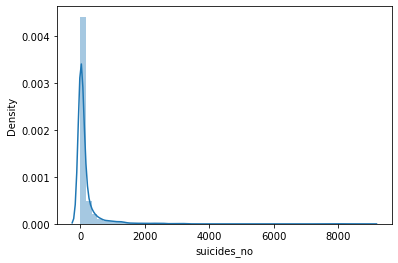

In [552]:
sns.distplot(final_df['suicides_no'])

It appears that the number of suicides is generally low.

<AxesSubplot:xlabel='year', ylabel='Density'>

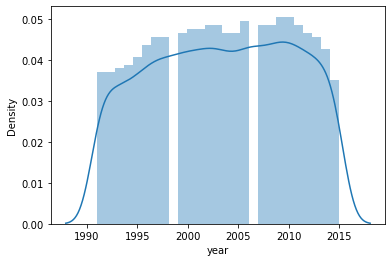

In [553]:
sns.distplot(final_df['year'])

It looks like we have fewer data for initial and later years

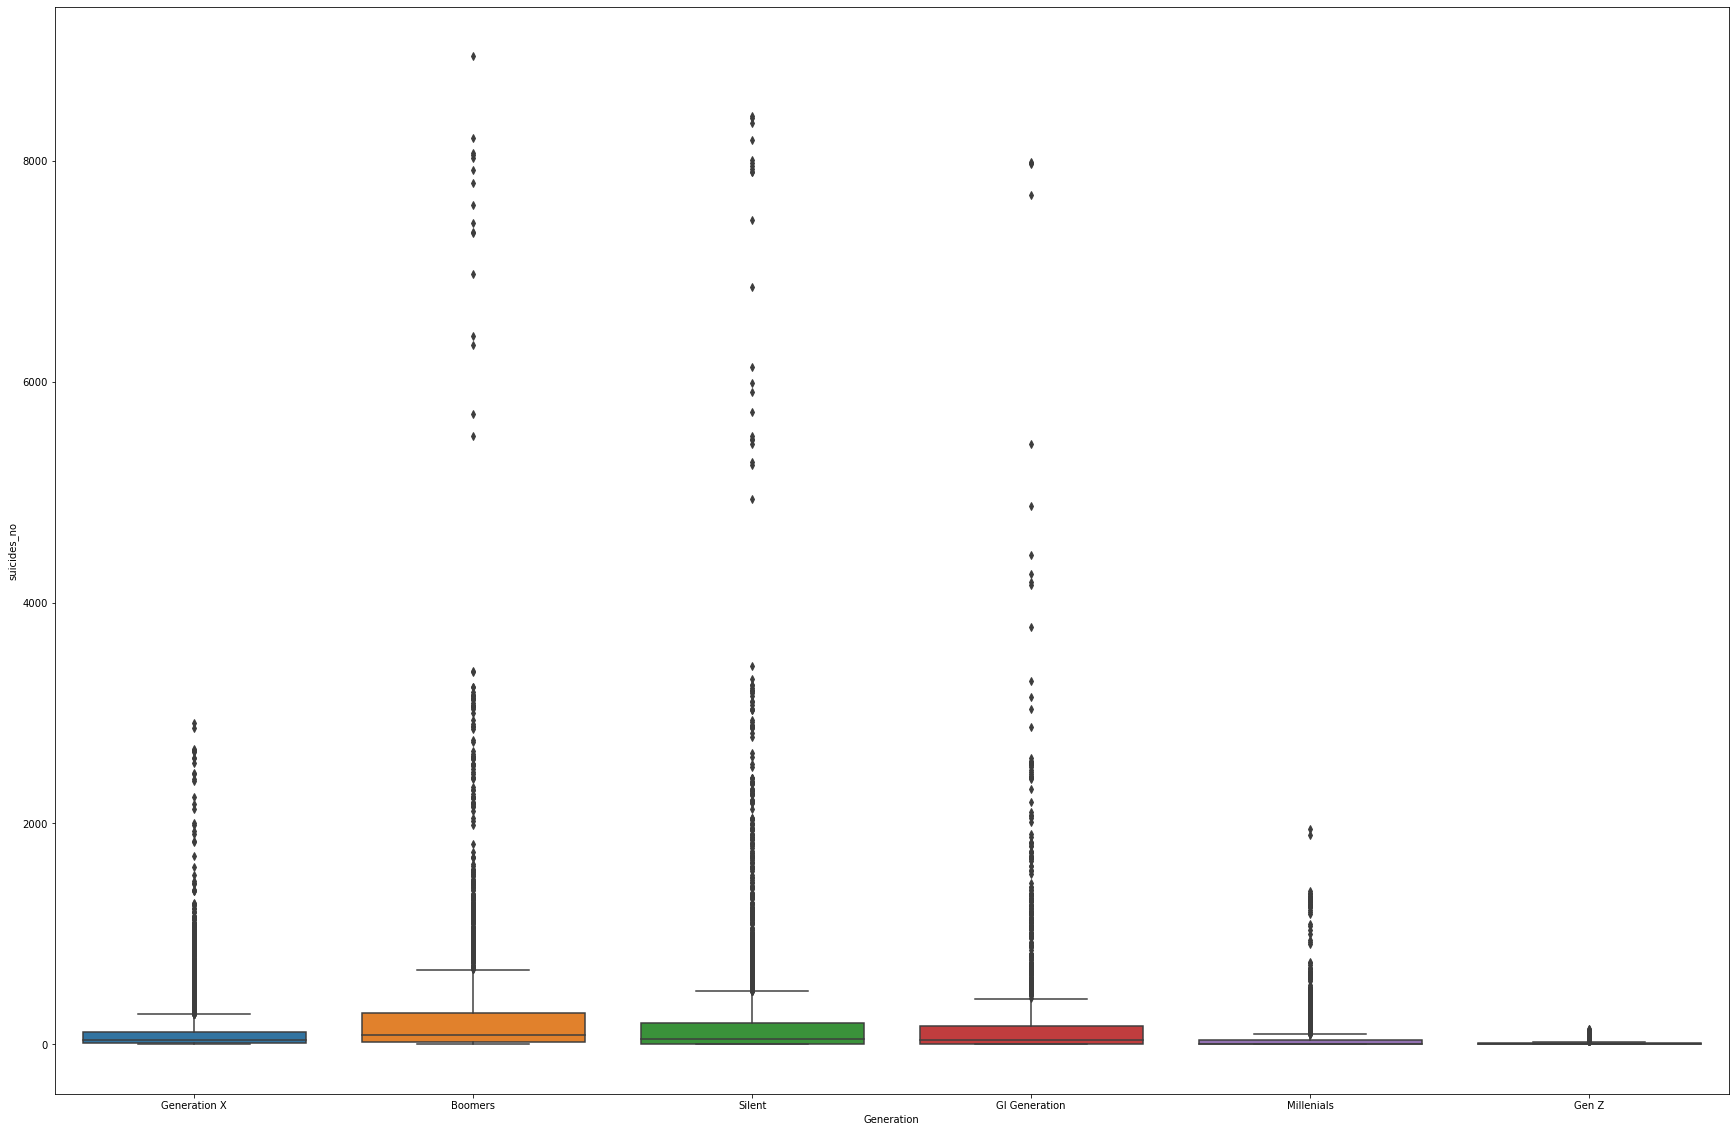

In [554]:
# final_df.boxplot(by=['year'], column=['suicides_no'])
plt.figure(figsize=(30,20))
ax = sns.boxplot(x="Generation", y="suicides_no", data=final_df)

It appears that there is high variation in suicides for each generation. Overall there seems to be a lot of variation for each generation.

In [555]:
final_df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5916 entries, 96 to 13883
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          5916 non-null   object 
 1   year                             5916 non-null   int64  
 2   sex                              5916 non-null   object 
 3   age                              5916 non-null   object 
 4   suicides_no                      5916 non-null   float64
 5   population                       5916 non-null   float64
 6   hdi                              5916 non-null   float64
 7   gdp_current_us$                  5916 non-null   float64
 8   gdp_growth_annual_%              5916 non-null   float64
 9   gdp_per_capita_current_us$       5916 non-null   float64
 10  employement_rate                 5916 non-null   float64
 11  suicide/100k                     5916 non-null   float64
 12  generation        

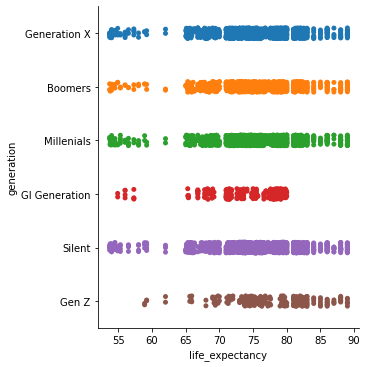

In [556]:
sns.catplot(x="life_expectancy",y="generation",data=final_df_two)


The life expectancy across generation shows that GI have a lower life expectancy compared to other generations

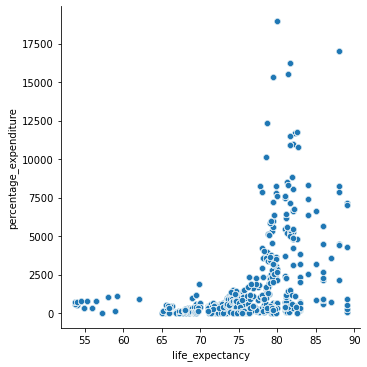

In [557]:
sns.relplot(x='life_expectancy',y='percentage_expenditure',data=final_df_two)

We see that with increased expenditure for public health life expectancy increases

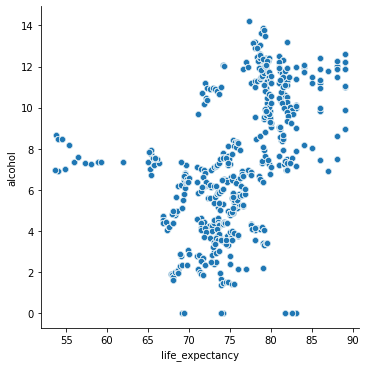

In [558]:
sns.relplot(x='life_expectancy',y='alcohol',data=final_df_two)

Not able to see any set pattern in terms of alcohol use and life expectancy

#### Checking for variable correlations to ensure we do not have the same information twice and to ensure that each variable will not skew our model due to high correlation

<AxesSubplot:>

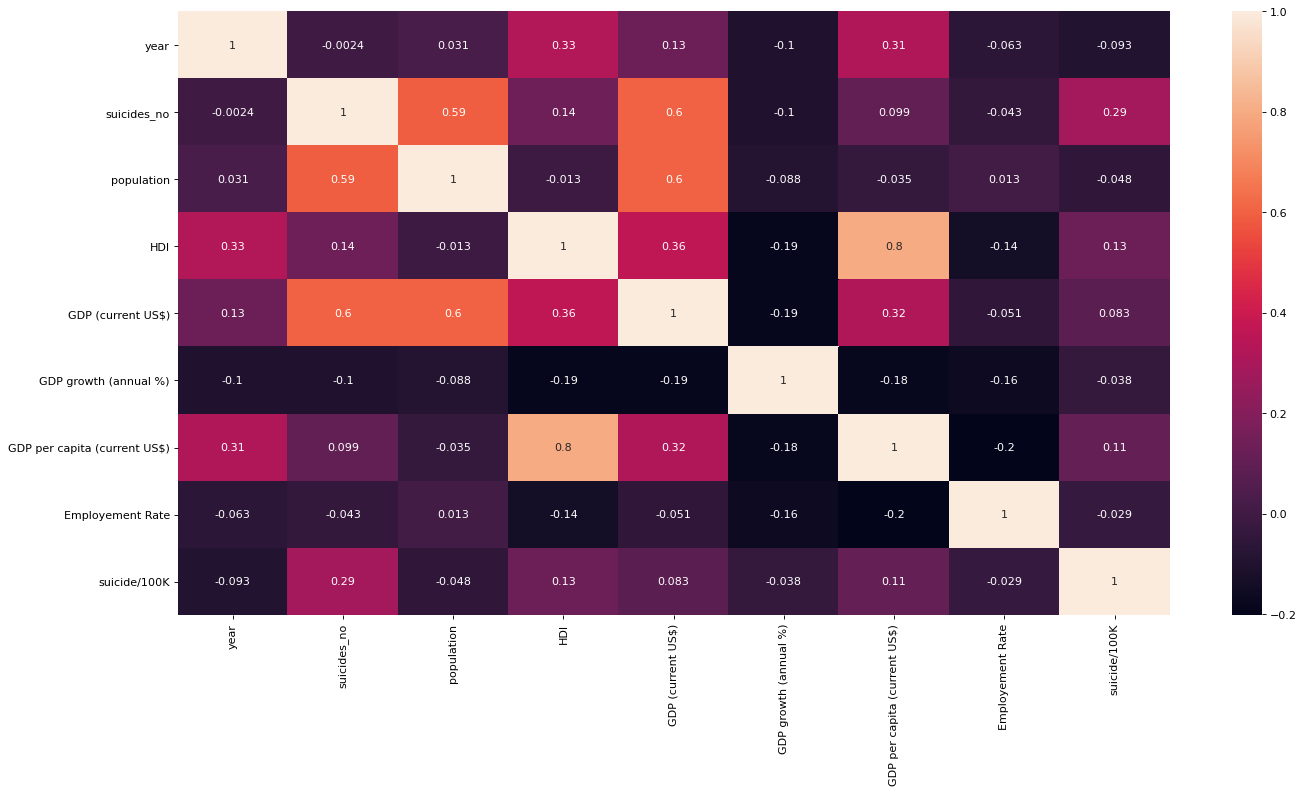

In [559]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)

sns.heatmap(final_df.iloc[:,1:].corr(),annot = True)

- It appears that population and suicide_no have a medium correlation. 
- It appears the GPD and population have a medium correlation. This may be because GDP is calculated using the population size. 
- It appears that HDI and GDP are highly correlated. This may be because HDI is used to rank countries into tiers of human development and when calculated take into acount per capita income.
- Since one variable may be used in the calculation for another variable this would explains why are seeing some variables with higher correlations. 

<AxesSubplot:>

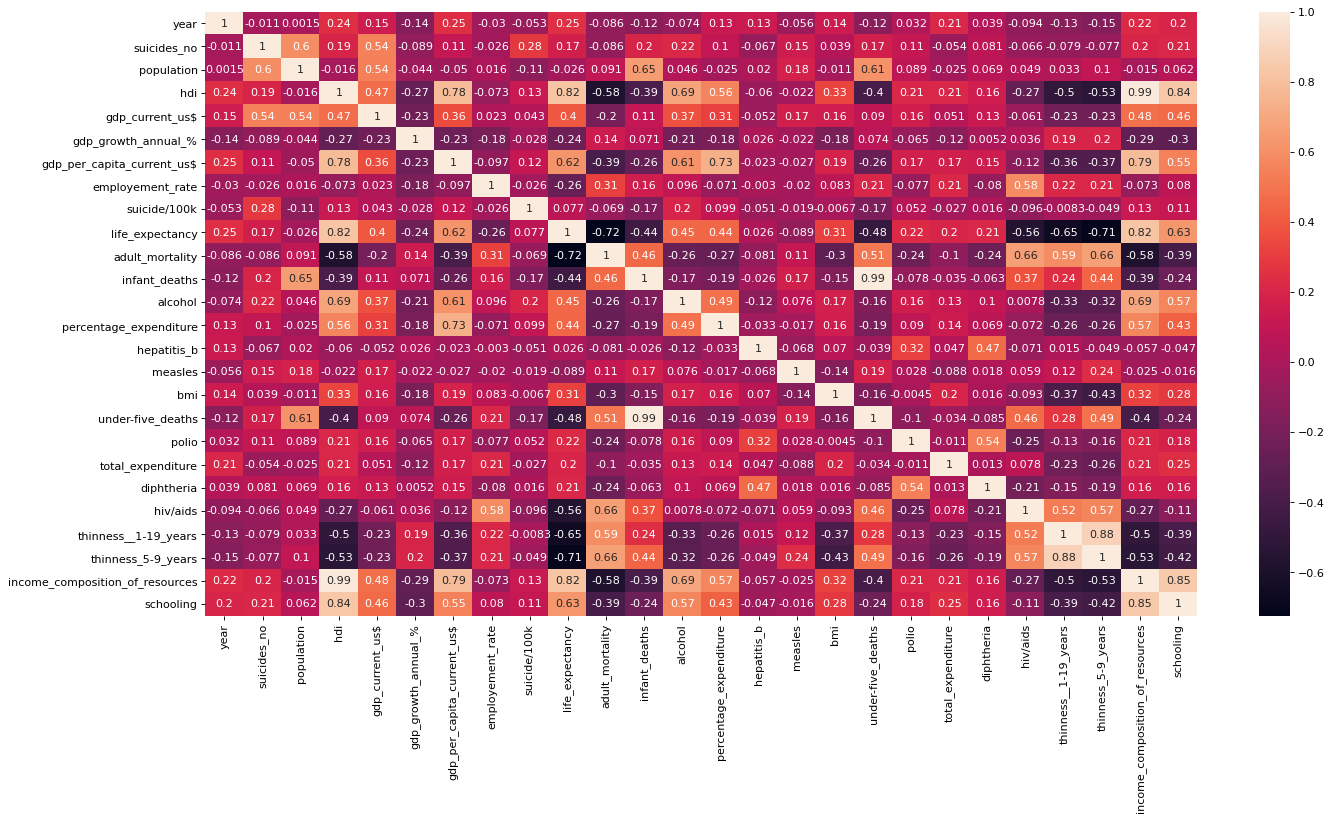

In [560]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)

sns.heatmap(final_df_two.iloc[:,1:].corr(),annot = True)

- It appears that life expectancy and HDI,GDP,expenditure on health,income composition and schooling have very good correlation. 
- Adult mortality has a strong correlation with HIV,income composition and HDI
- Alcohol use also has strong correlation with the economic indicators of a country as well as income composition and schooling.
- Since one variable may be used in the calculation for another variable this would explains why are seeing some variables with higher correlations. 

# 4. Classification and Predication Variable Selection

- Our Prediction variable is going to be the suicide no.
- Our Prediction variable is going to be the Employability rate
- Our Prediction variable is going to be Life expectancy
- The generation based on the suicide no and other attributes



### Models

#### For Regression
- Multi-linear regression 
- Polynomial regression
- Decision tree regressor 
- Random forest 
- Lasso/Ridge 

#### For Classification

- KNN
- Naive Bayes
- Random Forest Classifier

# 5. Questions to be answered using the datasets

#### Predict No. of  Suicides by (in 2015) based on the other attributes
- Top & Bottom 10 countries with highest suicide rates (in 2015)

####  Classifying which generation has the highest chance of commiting suicide in 2015
- See which generation is commiting suicide more and when (year)


#### Predicting the employment rate in 2015 based on other attributes, including suicide.


####  Predicting life expectancy in 2014 based on the other attributes


#### How 2008 financial crisis affected suicide rates across countries
- If any particular generation was affected the most


# 6. Preliminary Test

In [561]:
max(final_df.year)

2015

In [562]:
final_df.year.value_counts().sort_values(ascending=False)

2010    624
2009    624
2006    612
2011    600
2002    600
2003    600
2007    600
2008    600
2001    588
2000    588
2005    576
2012    576
2004    576
1999    576
1997    564
2013    564
1998    564
1996    540
2014    528
1995    504
1994    480
1993    468
1992    456
1991    456
2015    432
Name: year, dtype: int64

### Going through the categorical variables


In [563]:
final_df

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,Generation
36,Albania,1992,female,15-24 years,7.0,292400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,2.393981,Generation X
37,Albania,1992,female,25-34 years,4.0,267400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,1.495886,Boomers
38,Albania,1992,female,35-54 years,2.0,323100.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.619003,Silent
39,Albania,1992,female,5-14 years,0.0,336700.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.000000,Generation X
40,Albania,1992,female,55-74 years,1.0,164900.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.606428,GI Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,Uruguay,2015,male,25-34 years,96.0,235597.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,40.747548,Millenials
35108,Uruguay,2015,male,35-54 years,135.0,423963.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,31.842401,Boomers
35109,Uruguay,2015,male,5-14 years,3.0,252509.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,1.188076,Gen Z
35110,Uruguay,2015,male,55-74 years,133.0,277870.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,47.864109,Silent


In [564]:
final_df.age.value_counts()

55-74 years    2316
15-24 years    2316
5-14 years     2316
75+ years      2316
25-34 years    2316
35-54 years    2316
Name: age, dtype: int64

### Dropping Country as it does not add value while predicting.
- Dropping Generation as it was derived from year and age

In [565]:
reg_df = final_df.drop(columns=['country', 'Generation'])

In [566]:
reg_df = pd.get_dummies(reg_df,drop_first=True)

In [567]:
reg_df

,year,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
36,1992,7.0,292400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,2.393981,0,0,0,0,0,0
37,1992,4.0,267400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,1.495886,0,1,0,0,0,0
38,1992,2.0,323100.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.619003,0,0,1,0,0,0
39,1992,0.0,336700.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.000000,0,0,0,1,0,0
40,1992,1.0,164900.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.606428,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,2015,96.0,235597.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,40.747548,1,1,0,0,0,0
35108,2015,135.0,423963.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,31.842401,1,0,1,0,0,0
35109,2015,3.0,252509.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,1.188076,1,0,0,1,0,0
35110,2015,133.0,277870.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,47.864109,1,0,0,0,1,0


In [568]:
#Splitting into 2015 and the rest
test_2015 = reg_df[reg_df.year == 2015]

In [569]:
test_2015

,year,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
1032,2015,153.0,3394201.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,4.507688,0,0,0,0,0,0
1033,2015,114.0,3235582.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.523323,0,1,0,0,0,0
1034,2015,166.0,5301368.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.131267,0,0,1,0,0,0
1035,2015,19.0,3549219.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,0.535329,0,0,0,1,0,0
1036,2015,125.0,3520779.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.550351,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,2015,96.0,235597.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,40.747548,1,1,0,0,0,0
35108,2015,135.0,423963.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,31.842401,1,0,1,0,0,0
35109,2015,3.0,252509.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,1.188076,1,0,0,1,0,0
35110,2015,133.0,277870.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,47.864109,1,0,0,0,1,0


In [570]:
test_2015 = test_2015.drop(columns=['year'])

In [571]:
test_2015

,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
1032,153.0,3394201.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,4.507688,0,0,0,0,0,0
1033,114.0,3235582.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.523323,0,1,0,0,0,0
1034,166.0,5301368.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.131267,0,0,1,0,0,0
1035,19.0,3549219.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,0.535329,0,0,0,1,0,0
1036,125.0,3520779.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.550351,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,96.0,235597.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,40.747548,1,1,0,0,0,0
35108,135.0,423963.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,31.842401,1,0,1,0,0,0
35109,3.0,252509.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,1.188076,1,0,0,1,0,0
35110,133.0,277870.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,47.864109,1,0,0,0,1,0


In [572]:
test_2015_y = test_2015.pop('suicides_no')

In [573]:
test_2015_y

1032     153.0
1033     114.0
1034     166.0
1035      19.0
1036     125.0
         ...  
35107     96.0
35108    135.0
35109      3.0
35110    133.0
35111     58.0
Name: suicides_no, Length: 432, dtype: float64

In [574]:
test_2015_x = test_2015

In [575]:
test_2015_x

,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
1032,3394201.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,4.507688,0,0,0,0,0,0
1033,3235582.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.523323,0,1,0,0,0,0
1034,5301368.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.131267,0,0,1,0,0,0
1035,3549219.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,0.535329,0,0,0,1,0,0
1036,3520779.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.550351,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,235597.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,40.747548,1,1,0,0,0,0
35108,423963.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,31.842401,1,0,1,0,0,0
35109,252509.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,1.188076,1,0,0,1,0,0
35110,277870.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,47.864109,1,0,0,0,1,0


In [576]:
train =  reg_df[reg_df.year != 2015]

In [577]:
train.year.value_counts()

2010    624
2009    624
2006    612
2011    600
2003    600
2002    600
2007    600
2008    600
2001    588
2000    588
1999    576
2004    576
2012    576
2005    576
2013    564
1998    564
1997    564
1996    540
2014    528
1995    504
1994    480
1993    468
1991    456
1992    456
Name: year, dtype: int64

In [578]:
train = train.drop(columns=['year'])

In [579]:
train

,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
36,7.0,292400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,2.393981,0,0,0,0,0,0
37,4.0,267400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,1.495886,0,1,0,0,0,0
38,2.0,323100.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.619003,0,0,1,0,0,0
39,0.0,336700.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.000000,0,0,0,1,0,0
40,1.0,164900.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.606428,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35095,81.0,234529.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.537307,1,1,0,0,0,0
35096,150.0,421245.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,35.608731,1,0,1,0,0,0
35097,1.0,253946.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,0.393785,1,0,0,1,0,0
35098,95.0,272749.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.830558,1,0,0,0,1,0


In [580]:
train_y = train.pop('suicides_no')

In [581]:
train_y

36         7.0
37         4.0
38         2.0
39         0.0
40         1.0
         ...  
35095     81.0
35096    150.0
35097      1.0
35098     95.0
35099     55.0
Name: suicides_no, Length: 13464, dtype: float64

In [582]:
train_x = train

In [583]:
train_x

,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years
36,292400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,2.393981,0,0,0,0,0,0
37,267400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,1.495886,0,1,0,0,0,0
38,323100.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.619003,0,0,1,0,0,0
39,336700.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.000000,0,0,0,1,0,0
40,164900.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.606428,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35095,234529.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.537307,1,1,0,0,0,0
35096,421245.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,35.608731,1,0,1,0,0,0
35097,253946.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,0.393785,1,0,0,1,0,0
35098,272749.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.830558,1,0,0,0,1,0


# Predicting Suicide Rates

#### 1) Linear Model

In [584]:
lm_suicide = LinearRegression()
lm_suicide.fit(train_x,train_y)
print("Train R-squared: ", lm_suicide.score(train_x,train_y))
print('Train MSE: %.2f'% mean_squared_error(train_y, lm_suicide.predict(train_x))+"\n")

print("Testing R-squared: ", lm_suicide.score(test_2015_x,test_2015_y))
print('Test MSE: %.2f'% mean_squared_error(test_2015_y, lm_suicide.predict(test_2015_x)))

Train R-squared:  0.5454586046086058
Train MSE: 140707.78

Testing R-squared:  0.5875936867576772
Test MSE: 117506.47


### Not a great fit! Let'a try to check if it improves with polynomial degrees

In [585]:
lm_poly_suc = LinearRegression()

for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    X_poltrain = poly.fit_transform(train_x)
    X_poltest_2015 = poly.fit_transform(test_2015_x)
    lm_poly_suc.fit(X_poltrain, train_y)
    print("------------")
    print("Degree: ",i)
    print("Train R-squared: ", lm_poly_suc.score(X_poltrain,train_y))
    print('Train MSE: %.2f'% mean_squared_error(train_y, lm_poly_suc.predict(X_poltrain))+"\n")
    print("Testing R-squared: ", lm_poly_suc.score(X_poltest_2015,test_2015_y))
    print('Test MSE: %.2f'% mean_squared_error(test_2015_y, lm_poly_suc.predict(X_poltest_2015)))

------------
Degree:  1
Train R-squared:  0.545458604872062
Train MSE: 140707.78

Testing R-squared:  0.5875973902681451
Test MSE: 117505.42
------------
Degree:  2
Train R-squared:  0.8600763409145119
Train MSE: 43314.75

Testing R-squared:  0.8569635573376312
Test MSE: 40755.22
------------
Degree:  3
Train R-squared:  0.7265320341367318
Train MSE: 84654.71

Testing R-squared:  0.7262408574405335
Test MSE: 78001.89
------------
Degree:  4
Train R-squared:  0.7401243526849183
Train MSE: 80447.07

Testing R-squared:  0.7659723613002101
Test MSE: 66681.24


### MSE just kept increasing and no improvement in R Squared,except in Degree 2

In [586]:
train_x.columns

Index(['population', 'HDI', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Employement Rate', 'suicide/100K',
       'sex_male', 'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years'],
      dtype='object')

Decision Tree Train score 0.894831336311512
Decision Tree Test score 0.8293162337111804


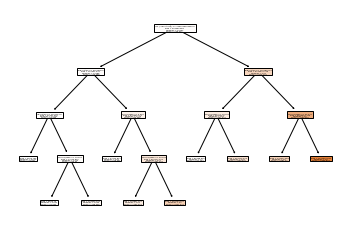

In [587]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn import tree

dt_suic = DecisionTreeRegressor(max_leaf_nodes=10)
dt_suic = dt_suic.fit(train_x, train_y)
r =export_text(dt_suic, feature_names=['population', 'HDI', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Employement Rate', 'suicide/100K',
       'sex_male', 'age_25-34 years', 'age_35-54 years', 'age_5-14 years',
       'age_55-74 years', 'age_75+ years'])

plot_tree = tree.plot_tree(dt_suic, feature_names=['population', 'HDI', 'GDP (current US$)', 'GDP growth (annual %)','GDP per capita (current US$)', 'Employement Rate', 'suicide/100K','sex_male', 'age_25-34 years', 'age_35-54 years', 'age_5-14 years','age_55-74 years', 'age_75+ years'],filled=True)

print("Decision Tree Train score",dt_suic.score(train_x,train_y))
print("Decision Tree Test score",dt_suic.score(test_2015_x,test_2015_y))

## Ridge Model

In [588]:
model_ridge_suic = Ridge(normalize=True)
errors_suic= []
coeficents_suic = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_ridge_suic.set_params(alpha=a)
    model_ridge_suic.fit(train_x, train_y)
    CV_error = np.mean(cross_val_score(model_ridge_suic, train_x, train_y, cv=10, scoring='neg_mean_squared_error'))
    coeficents_suic.append(model_ridge_suic.coef_)
    errors_suic.append(CV_error)

In [589]:
error_suic = np.abs(errors_suic)
print("Min error: ", np.min(error_suic))
ridge_minError = np.min(error_suic)
index_minerr = (np.where(error_suic == np.min(error_suic))[0])
print("Best alpha: ", alphas[index_minerr])

Min error:  173851.04302037624
Best alpha:  [0.14033215]


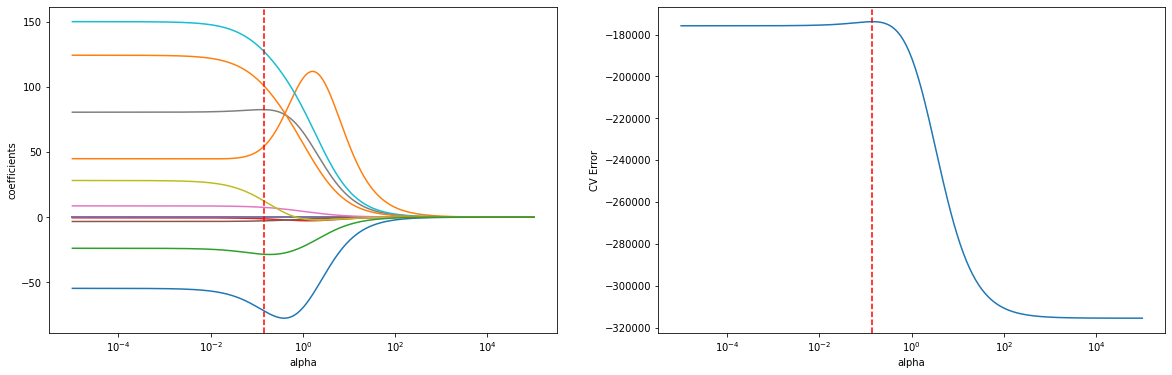

In [590]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents_suic)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors_suic)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

In [591]:
model_ridgeCV_suic = RidgeCV(cv=10, normalize=True,scoring="neg_mean_squared_error", alphas = np.logspace(-5, 5, 300))
model_ridgeCV_suic.fit(train_x, train_y)

print("Ridge - alpha: "+str(model_ridgeCV_suic.alpha_))
print("Ridge - Train Accuracy: \n",model_ridgeCV_suic.score(train_x,train_y))
print("Ridge - Test Accuracy: \n",model_ridgeCV_suic.score(test_2015_x,test_2015_y))

Ridge - alpha: 0.14033215376054847
Ridge - Train Accuracy: 
 0.541356665872081
Ridge - Test Accuracy: 
 0.5955827184795617


## Lasso Model

In [592]:
model_lasso_suic = Lasso(normalize=True)
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_lasso_suic.set_params(alpha=a)
    model_lasso_suic.fit(train_x, train_y)
    CV_error = np.mean(cross_val_score(model_lasso_suic, train_x, train_y, cv=10, scoring='neg_mean_squared_error'))
    coeficents.append(model_lasso_suic.coef_)
    errors.append(CV_error)

In [593]:
error = np.abs(errors)
print("Min error: ", np.min(error))
lasso_minerr = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])+1
print("Best alpha: ", alphas[index_minerr])

Min error:  175823.3536604809
Best alpha:  [1.08005237e-05]


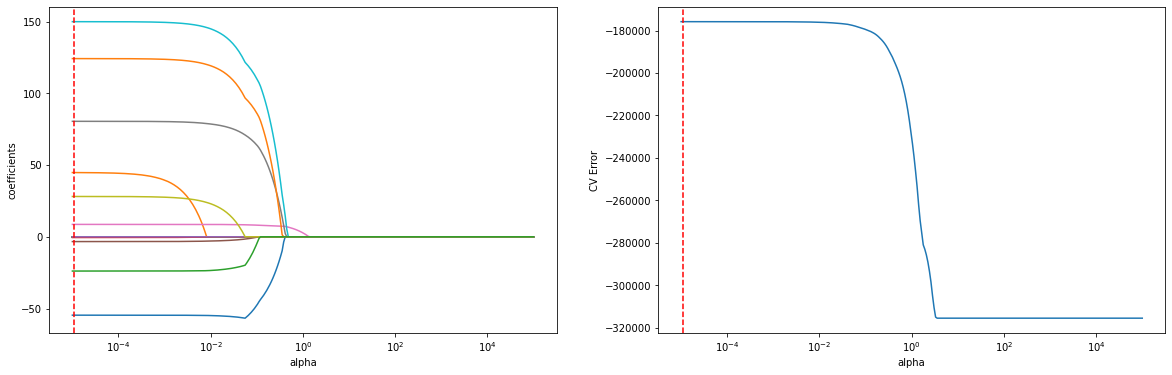

In [594]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

In [595]:
model_lassoCV_suic = LassoCV(cv=10, normalize=True,alphas = np.logspace(-5, 5, 300))
model_lassoCV_suic.fit(train_x,train_y)
print("Lasso - alpha: "+str(model_lassoCV_suic.alpha_))
print("Lasso Train Score "+str(model_lassoCV_suic.score(test_2015_x,test_2015_y)))
print("Lasso Test Score "+str(model_lassoCV_suic.score(test_2015_x,test_2015_y)))

Lasso - alpha: 1e-05
Lasso Train Score 0.5875986778455069
Lasso Test Score 0.5875986778455069


#### Best results from  Lasso, Ridge. 
#### Ridge was the better model


## Random Forest

In [596]:
# We had more parameters initially but once we got the initial results, we reduced the number of parameters, in the interest
# of time
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100,150,200,250]
}

In [597]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

dfrst = RandomForestRegressor(random_state=1)
grid_suicide = GridSearchCV(estimator=dfrst, param_grid=param_grid,cv = 10, n_jobs = -1, verbose = 1)
grid_results_suicide = grid_suicide.fit(train_x, train_y)

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  8.1min finished


In [598]:
print(grid_results_suicide.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}


In [599]:
#Setting the best params and building model
rf_reg = RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, n_estimators= 200)
rf_reg.fit(train_x, train_y)

print("R Squared Train",rf_reg.score(train_x,train_y))
print("R Squared Test",rf_reg.score(test_2015_x,test_2015_y))

R Squared Train 0.9934790161165564
R Squared Test 0.9847684074814614


In [600]:
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

def evaluate(model, test_features, y_test):
    y_pred = model.predict(test_features)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [601]:
best_grid = grid_results_suicide.best_estimator_
grid_accuracy = evaluate(best_grid, test_2015_x, test_2015_y)

Mean Absolute Error: 25.753620934237464
Mean Squared Error: 5502.828274852812
Root Mean Squared Error: 74.18105064538256


In [602]:
#Extracting the feature Importance
var_imp = rf_reg.feature_importances_
var_imp

array([0.35645759, 0.0333158 , 0.23601794, 0.01162749, 0.03341581,
       0.02301533, 0.19107941, 0.04645565, 0.00319073, 0.02214529,
       0.01260308, 0.01821496, 0.01246091])

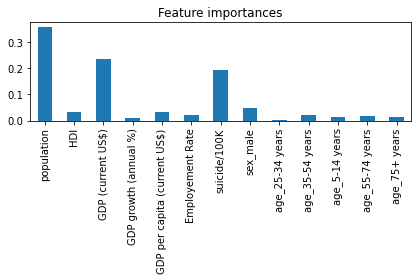

In [603]:
#plotting the feature importance
imp_series = pd.Series(var_imp, index=train_x.columns)

fig, ax = plt.subplots()
imp_series.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

#### We can see that population,GDP are the most important factor when predicting suicides

### Comparing Different Models for Suicide No. Prediction

In [604]:
# Regression Models

print("Train R-squared: ", lm_suicide.score(train_x,train_y))
print('Train MSE: %.2f'% mean_squared_error(train_y, lm_suicide.predict(train_x))+"\n")

print("Testing R-squared: ", lm_suicide.score(test_2015_x,test_2015_y))
print('Test MSE: %.2f'% mean_squared_error(test_2015_y, lm_suicide.predict(test_2015_x)))
print("\n")
print("Ridge - Train Accuracy:",model_ridgeCV_suic.score(train_x,train_y))
print("Ridge - Test Accuracy:",model_ridgeCV_suic.score(test_2015_x,test_2015_y))
print("\n")
print("Lasso Train Score "+str(model_lassoCV_suic.score(train_x,train_y)))
print("Lasso Test Score "+str(model_lassoCV_suic.score(test_2015_x,test_2015_y)))

Train R-squared:  0.5454586046086058
Train MSE: 140707.78

Testing R-squared:  0.5875936867576772
Test MSE: 117506.47


Ridge - Train Accuracy: 0.541356665872081
Ridge - Test Accuracy: 0.5955827184795617


Lasso Train Score 0.5454586047856151
Lasso Test Score 0.5875986778455069


In [605]:
# Tree Models

print("Decision Tree Train score",dt_suic.score(train_x,train_y))
print("Decision Tree Test score",dt_suic.score(test_2015_x,test_2015_y))
print("\n")
print("Random Forest R Squared Train",rf_reg.score(train_x,train_y))
print("Random Forest R Squared Test",rf_reg.score(test_2015_x,test_2015_y))

print("Random Forest MSE")
best_grid = grid_results_suicide.best_estimator_
grid_accuracy = evaluate(best_grid, test_2015_x, test_2015_y)

Decision Tree Train score 0.894831336311512
Decision Tree Test score 0.8293162337111804


Random Forest R Squared Train 0.9934790161165564
Random Forest R Squared Test 0.9847684074814614
Random Forest MSE
Mean Absolute Error: 25.753620934237464
Mean Squared Error: 5502.828274852812
Root Mean Squared Error: 74.18105064538256


### From all these models, from the R squared values and the MSE we can see that random forest model works best

## Top 10 and lower 10 suicide scores for counties based on sex and age groups

In [606]:
#turning the predictions to a list
y_predict = rf_reg.predict(test_2015_x).tolist()

In [607]:
# extracting a list of the countries to reference later when we find the top 10 and lower 10
final_df_year = final_df[final_df['year'] == 2015]

In [608]:
test_country = final_df_year[['country','sex', 'age']]

test_country

,country,sex,age
1032,Argentina,female,15-24 years
1033,Argentina,female,25-34 years
1034,Argentina,female,35-54 years
1035,Argentina,female,5-14 years
1036,Argentina,female,55-74 years
...,...,...,...
35107,Uruguay,male,25-34 years
35108,Uruguay,male,35-54 years
35109,Uruguay,male,5-14 years
35110,Uruguay,male,55-74 years


In [609]:
# creating a list of the counties to append to the predictions
country = test_country.values.tolist()

In [610]:
test_country.loc[test_country['country'] == 'Brazil']

,country,sex,age
5496,Brazil,female,15-24 years
5497,Brazil,female,25-34 years
5498,Brazil,female,35-54 years
5499,Brazil,female,5-14 years
5500,Brazil,female,55-74 years
5501,Brazil,female,75+ years
5502,Brazil,male,15-24 years
5503,Brazil,male,25-34 years
5504,Brazil,male,35-54 years
5505,Brazil,male,5-14 years


In [611]:
zipped = list(zip(y_predict, country))  #zippled the two lists 

In [612]:
listed = list(zipped) #turning zipped 

In [613]:
listed.sort(reverse = True)

In [614]:
#top 10 countries and scores
print(listed[0:10])

[(5295.795394976758, ['Japan', 'male', '35-54 years']), (5157.521418125175, ['Japan', 'male', '55-74 years']), (2424.2547984584853, ['Japan', 'female', '55-74 years']), (2389.040382346819, ['Brazil', 'male', '35-54 years']), (2257.6465315080095, ['Germany', 'male', '55-74 years']), (2228.7038337773342, ['Germany', 'male', '35-54 years']), (2168.72428150281, ['Japan', 'female', '35-54 years']), (1903.9806773467558, ['Japan', 'male', '75+ years']), (1776.102776018916, ['Japan', 'male', '25-34 years']), (1684.5885691253193, ['Brazil', 'male', '25-34 years'])]


-  From this we can conclude that males in the age braket 35-54 in Japan are predicted to have the highest amounts of suicides. This information is useful to know for suicide prevention programs. Suicide prevention programs can target their resources to this population to prevent suicides.

In [615]:
listed.sort()

In [616]:
#lower 10 countries and scores
print(listed[0:10])

[(0.0472664634191696, ['Brunei Darussalam', 'female', '5-14 years']), (0.08649639975982257, ['Belize', 'female', '5-14 years']), (0.0988184523809524, ['Belize', 'female', '75+ years']), (0.13298602274918062, ['Brunei Darussalam', 'male', '5-14 years']), (0.20062788600288597, ['Belize', 'female', '25-34 years']), (0.20211382553760607, ['Mauritius', 'male', '5-14 years']), (0.22540238305755547, ['Mauritius', 'female', '75+ years']), (0.2475722349545879, ['Mauritius', 'female', '5-14 years']), (0.27206752044252047, ['Malta', 'female', '5-14 years']), (0.38848986501757116, ['Cyprus', 'female', '5-14 years'])]


- Similarly, females in the age bracket of 5-14 years old in Belize are predicted to have the lowest amounts of suicides. This information is useful to know so that suicide prevention programs can reallocate resources efficiently to other countries that have higher rates. 

## Predicting Employment Model

In [617]:
final_df

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,Generation
36,Albania,1992,female,15-24 years,7.0,292400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,2.393981,Generation X
37,Albania,1992,female,25-34 years,4.0,267400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,1.495886,Boomers
38,Albania,1992,female,35-54 years,2.0,323100.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.619003,Silent
39,Albania,1992,female,5-14 years,0.0,336700.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.000000,Generation X
40,Albania,1992,female,55-74 years,1.0,164900.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.606428,GI Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,Uruguay,2015,male,25-34 years,96.0,235597.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,40.747548,Millenials
35108,Uruguay,2015,male,35-54 years,135.0,423963.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,31.842401,Boomers
35109,Uruguay,2015,male,5-14 years,3.0,252509.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,1.188076,Gen Z
35110,Uruguay,2015,male,55-74 years,133.0,277870.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,47.864109,Silent


In [618]:
emp_test_2015 = final_df[final_df.year==2015]
emp_test_2015

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,Generation
1032,Argentina,2015,female,15-24 years,153.0,3394201.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,4.507688,Millenials
1033,Argentina,2015,female,25-34 years,114.0,3235582.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.523323,Millenials
1034,Argentina,2015,female,35-54 years,166.0,5301368.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.131267,Boomers
1035,Argentina,2015,female,5-14 years,19.0,3549219.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,0.535329,Gen Z
1036,Argentina,2015,female,55-74 years,125.0,3520779.0,0.840,5.950000e+11,2.731160,13789.06042,7.61,3.550351,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,Uruguay,2015,male,25-34 years,96.0,235597.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,40.747548,Millenials
35108,Uruguay,2015,male,35-54 years,135.0,423963.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,31.842401,Boomers
35109,Uruguay,2015,male,5-14 years,3.0,252509.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,1.188076,Gen Z
35110,Uruguay,2015,male,55-74 years,133.0,277870.0,0.806,5.327430e+10,0.370741,15613.74597,7.49,47.864109,Silent


In [619]:
Y_emp_test_2015 = emp_test_2015.pop ('Employement Rate')
Y_emp_test_2015

1032     7.61
1033     7.61
1034     7.61
1035     7.61
1036     7.61
         ... 
35107    7.49
35108    7.49
35109    7.49
35110    7.49
35111    7.49
Name: Employement Rate, Length: 432, dtype: float64

In [620]:
#dropping categorical attributes we will not need for our model
x_emp_test_2015 = emp_test_2015.drop(columns=['year','country','sex','age','Generation'],axis=1)
x_emp_test_2015

,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),suicide/100K
1032,153.0,3394201.0,0.840,5.950000e+11,2.731160,13789.06042,4.507688
1033,114.0,3235582.0,0.840,5.950000e+11,2.731160,13789.06042,3.523323
1034,166.0,5301368.0,0.840,5.950000e+11,2.731160,13789.06042,3.131267
1035,19.0,3549219.0,0.840,5.950000e+11,2.731160,13789.06042,0.535329
1036,125.0,3520779.0,0.840,5.950000e+11,2.731160,13789.06042,3.550351
...,...,...,...,...,...,...,...
35107,96.0,235597.0,0.806,5.327430e+10,0.370741,15613.74597,40.747548
35108,135.0,423963.0,0.806,5.327430e+10,0.370741,15613.74597,31.842401
35109,3.0,252509.0,0.806,5.327430e+10,0.370741,15613.74597,1.188076
35110,133.0,277870.0,0.806,5.327430e+10,0.370741,15613.74597,47.864109


In [621]:
#assigning train dataset to years not in 2015
emp_train = final_df[final_df.year!=2015]
emp_train

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,Generation
36,Albania,1992,female,15-24 years,7.0,292400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,2.393981,Generation X
37,Albania,1992,female,25-34 years,4.0,267400.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,1.495886,Boomers
38,Albania,1992,female,35-54 years,2.0,323100.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.619003,Silent
39,Albania,1992,female,5-14 years,0.0,336700.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.000000,Generation X
40,Albania,1992,female,55-74 years,1.0,164900.0,0.615,6.521750e+08,-7.187111,200.85222,16.33,0.606428,GI Generation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35095,Uruguay,2014,male,25-34 years,81.0,234529.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.537307,Generation X
35096,Uruguay,2014,male,35-54 years,150.0,421245.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,35.608731,Boomers
35097,Uruguay,2014,male,5-14 years,1.0,253946.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,0.393785,Gen Z
35098,Uruguay,2014,male,55-74 years,95.0,272749.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.830558,Silent


In [622]:
#assigning y train dataset the employment rates
Y_emp_train = emp_train.pop ('Employement Rate')
Y_emp_train

36       16.33
37       16.33
38       16.33
39       16.33
40       16.33
         ...  
35095     6.55
35096     6.55
35097     6.55
35098     6.55
35099     6.55
Name: Employement Rate, Length: 13464, dtype: float64

In [623]:
#dropping attributes we will not need for model
x_emp_train = emp_train.drop(columns=['year','country','sex','age','Generation'],axis=1)
x_emp_train

,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),suicide/100K
36,7.0,292400.0,0.615,6.521750e+08,-7.187111,200.85222,2.393981
37,4.0,267400.0,0.615,6.521750e+08,-7.187111,200.85222,1.495886
38,2.0,323100.0,0.615,6.521750e+08,-7.187111,200.85222,0.619003
39,0.0,336700.0,0.615,6.521750e+08,-7.187111,200.85222,0.000000
40,1.0,164900.0,0.615,6.521750e+08,-7.187111,200.85222,0.606428
...,...,...,...,...,...,...,...
35095,81.0,234529.0,0.803,5.723601e+10,3.238791,16831.94819,34.537307
35096,150.0,421245.0,0.803,5.723601e+10,3.238791,16831.94819,35.608731
35097,1.0,253946.0,0.803,5.723601e+10,3.238791,16831.94819,0.393785
35098,95.0,272749.0,0.803,5.723601e+10,3.238791,16831.94819,34.830558


## Modelling

##### 1. Linear Model

In [624]:
lm_emp = LinearRegression()
lm_emp.fit(x_emp_train,Y_emp_train)
print("Train R-squared: ", lm_emp.score(x_emp_train,Y_emp_train))
print('Train MSE: %.2f'% mean_squared_error(Y_emp_train, lm_emp.predict(x_emp_train))+"\n")

print("Testing R-squared: ", lm_emp.score(x_emp_test_2015,Y_emp_test_2015))
print('Test MSE: %.2f'% mean_squared_error(Y_emp_test_2015, lm_emp.predict(x_emp_test_2015)))

Train R-squared:  0.08704163882371785
Train MSE: 22.81

Testing R-squared:  0.05132227849660931
Test MSE: 29.98


-  Not a great model. Even though the MSE is low the R Squared value for test is very low.
- R squared should be closer to 1; and  lower the Mean Squared Error the better the model fits our data >> Here, both of these values indicate otherwise. Hence, we move on to try the next one.


##### 2. Polynomial Model

In [625]:
lm_poly_emp = LinearRegression()

for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    X_poltrain = poly.fit_transform(x_emp_train)
    X_poltest_2015 = poly.fit_transform(x_emp_test_2015)
    lm_poly_emp.fit(X_poltrain, Y_emp_train)
    print("------------")
    print("Degree: ",i)
    print("Train R-squared: ", lm_poly_emp.score(X_poltrain,Y_emp_train))
    print('Train MSE: %.2f'% mean_squared_error(Y_emp_train, lm_poly_emp.predict(X_poltrain))+"\n")
    print("Testing R-squared: ", lm_poly_emp.score(X_poltest_2015,Y_emp_test_2015))
    print('Test MSE: %.2f'% mean_squared_error(Y_emp_test_2015, lm_poly_emp.predict(X_poltest_2015)))

------------
Degree:  1
Train R-squared:  0.08704163882371618
Train MSE: 22.81

Testing R-squared:  0.05132227366652442
Test MSE: 29.98
------------
Degree:  2
Train R-squared:  0.06018511413448557
Train MSE: 23.48

Testing R-squared:  0.0868631789794585
Test MSE: 28.86
------------
Degree:  3
Train R-squared:  0.015039595881662038
Train MSE: 24.61

Testing R-squared:  0.024435502487003657
Test MSE: 30.83
------------
Degree:  4
Train R-squared:  -0.022564484322852962
Train MSE: 25.55

Testing R-squared:  -0.051184925195580044
Test MSE: 33.22


- Not a good fit. No improvement over the initial Linear Model
- Even with a polynomial degree line - the model fit does not improve. Hence we move to the next.


##### 3. Lasso Model

In [626]:
x_emp_train

,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),suicide/100K
36,7.0,292400.0,0.615,6.521750e+08,-7.187111,200.85222,2.393981
37,4.0,267400.0,0.615,6.521750e+08,-7.187111,200.85222,1.495886
38,2.0,323100.0,0.615,6.521750e+08,-7.187111,200.85222,0.619003
39,0.0,336700.0,0.615,6.521750e+08,-7.187111,200.85222,0.000000
40,1.0,164900.0,0.615,6.521750e+08,-7.187111,200.85222,0.606428
...,...,...,...,...,...,...,...
35095,81.0,234529.0,0.803,5.723601e+10,3.238791,16831.94819,34.537307
35096,150.0,421245.0,0.803,5.723601e+10,3.238791,16831.94819,35.608731
35097,1.0,253946.0,0.803,5.723601e+10,3.238791,16831.94819,0.393785
35098,95.0,272749.0,0.803,5.723601e+10,3.238791,16831.94819,34.830558


In [627]:
model_lasso_emp = Lasso(normalize=True)
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_lasso_emp.set_params(alpha=a)
    model_lasso_emp.fit(x_emp_train,Y_emp_train)
    CV_error = np.mean(cross_val_score(model_lasso_emp, x_emp_train,Y_emp_train, cv=10, scoring='neg_mean_squared_error'))
    coeficents.append(model_lasso_emp.coef_)
    errors.append(CV_error)

In [628]:
error = np.abs(errors)
print("Min error: ", np.min(error))
lasso_minerr = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])+1
print("Best alpha: ", alphas[index_minerr])

Min error:  24.75051521739631
Best alpha:  [0.00298481]


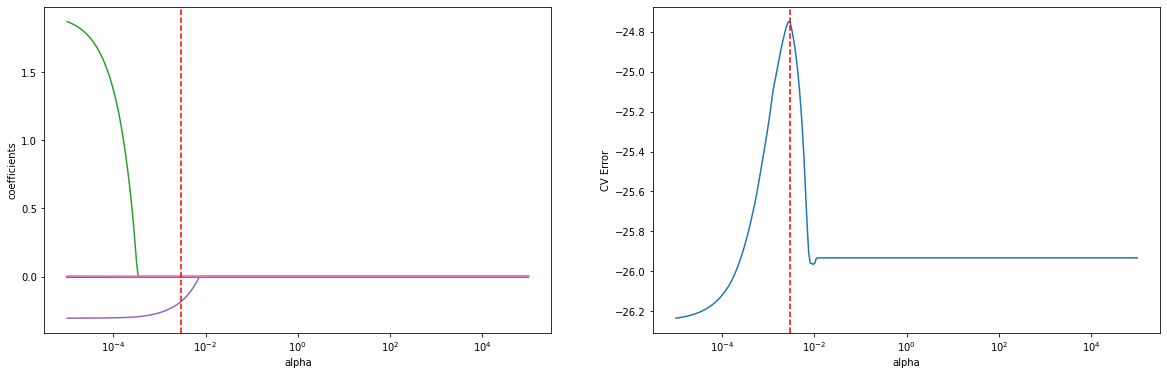

In [629]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

In [630]:
model_lassoCV_emp = LassoCV(cv=10, normalize=True,alphas = np.logspace(-5, 5, 300))
model_lassoCV_emp.fit(x_emp_train,Y_emp_train)
print("Lasso - alpha: "+str(model_lassoCV_emp.alpha_))
print("Lasso train score: "+str(model_lassoCV_emp.score(x_emp_train,Y_emp_train)))
print("Lasso test score: "+str(model_lassoCV_emp.score(x_emp_test_2015,Y_emp_test_2015)))

Lasso - alpha: 0.0027635770147361573
Lasso train score: 0.07475323072333973
Lasso test score: 0.04288199985252572


- When we tune our model with the best alpha, the testing score (R squared) is very low. Therefore, not a suitable fit.
- We can see that none of the features are helping us predict employment rates


##### 4. Ridge Model


In [631]:
model_ridge_emp = Ridge(normalize=True)
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_ridge_emp.set_params(alpha=a)
    model_ridge_emp.fit(x_emp_train,Y_emp_train)
    CV_error = np.mean(cross_val_score(model_ridge_emp, x_emp_train,Y_emp_train, cv=10, scoring='neg_mean_squared_error'))
    coeficents.append(model_ridge_emp.coef_)
    errors.append(CV_error)

In [632]:
error = np.abs(errors)
print("Min error: ", np.min(error))
ridge_minError = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])
print("Best alpha: ", alphas[index_minerr])

Min error:  25.45556186879238
Best alpha:  [0.96222712]


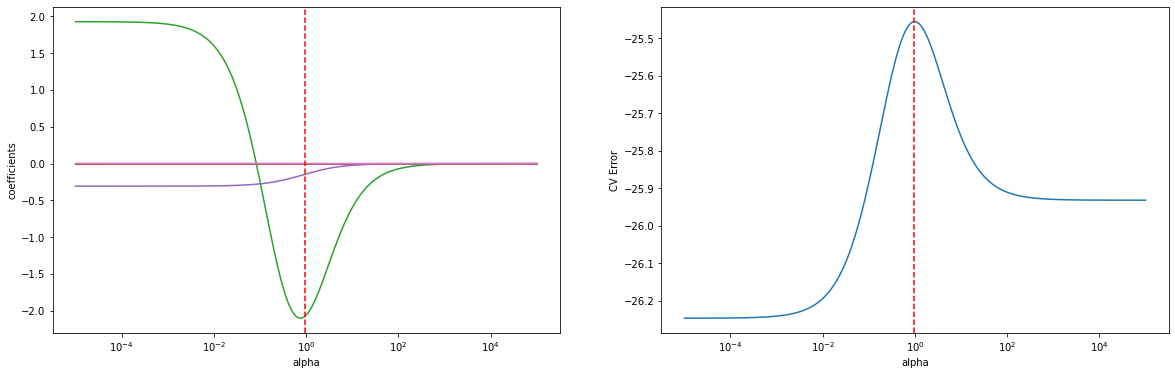

In [633]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

In [634]:
model_ridgeCV_emp = RidgeCV(cv=10, normalize=True,scoring="neg_mean_squared_error", alphas = np.logspace(-5, 5, 300))
model_ridgeCV_emp.fit(x_emp_train,Y_emp_train)

print("Ridge - alpha: "+str(model_ridgeCV_emp.alpha_))
print("Ridge - Train Accuracy: \n",model_ridgeCV_emp.score(x_emp_train,Y_emp_train))
print("Ridge - Test Accuracy: \n",model_ridgeCV_emp.score(x_emp_test_2015,Y_emp_test_2015))

Ridge - alpha: 0.9622271173675134
Ridge - Train Accuracy: 
 0.06290047867574255
Ridge - Test Accuracy: 
 0.034677581952912595


- Even when we tune our model with the best alpha, both the training and  testing score (R squared) is very low. Therefore, not a suitable fit.
- The shrinking coefficients shirk almost all parameters to zero. But even with the best alpha - the model isn’t a good fit


###### 5. Decision Tree

Decision Tree Train score 0.36421510807827506
Decision Tree Test score 0.09571658963051388


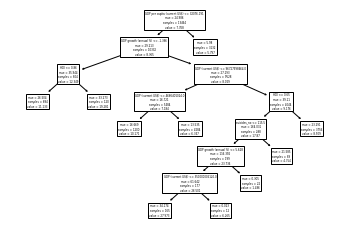

In [635]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn import tree

dt_emp = DecisionTreeRegressor(max_leaf_nodes=10)
dt_emp = dt_emp.fit(x_emp_train,Y_emp_train)
r =export_text(dt_emp, feature_names=['suicides_no', 'population', 'HDI', 'GDP (current US$)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'suicide/100K'])

plot_tree = tree.plot_tree(dt_emp, feature_names=['suicides_no', 'population', 'HDI', 'GDP (current US$)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'suicide/100K'])

print("Decision Tree Train score",dt_emp.score(x_emp_train,Y_emp_train))
print("Decision Tree Test score",dt_emp.score(x_emp_test_2015,Y_emp_test_2015))

In [636]:
x_emp_train.columns

Index(['suicides_no', 'population', 'HDI', 'GDP (current US$)',
       'GDP growth (annual %)', 'GDP per capita (current US$)',
       'suicide/100K'],
      dtype='object')

- Testing Score (MSE) is too low!

###### 6. Random Forest

In [637]:
# We had more parameters initially but once we got the initial results, we reduced the number of parameters, in the interest
# of time
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100,150,200]
}

In [638]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

dfrst = RandomForestRegressor(random_state=1)
grid_emp = GridSearchCV(estimator=dfrst, param_grid=param_grid,cv = 10, n_jobs = -1, verbose = 1)
grid_results_emp = grid_emp.fit(x_emp_train,Y_emp_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed: 10.8min finished


In [639]:
print(grid_results_emp.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 8, 'n_estimators': 50}


In [640]:
#Setting the best params and building model
rf_reg_emp = RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 2, min_samples_leaf= 5, 
                               min_samples_split= 8, n_estimators= 50,random_state=1)
rf_reg_emp.fit(x_emp_train, Y_emp_train)

print("R Squared Train",rf_reg_emp.score(x_emp_train,Y_emp_train))
print("R Squared Test",rf_reg_emp.score(x_emp_test_2015,Y_emp_test_2015))

R Squared Train 0.962295760274496
R Squared Test 0.1989202850162618


In [641]:
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

def evaluate(model, test_features, y_test):
    y_pred = model.predict(test_features)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [642]:
best_grid_emp = grid_results_emp.best_estimator_
grid_accuracy_emp = evaluate(best_grid_emp, x_emp_test_2015, Y_emp_test_2015)

Mean Absolute Error: 3.14276388503313
Mean Squared Error: 25.319805855910325
Root Mean Squared Error: 5.031878958789681


In [643]:
#Extracting the feature Importance
var_imp_emp = rf_reg_emp.feature_importances_
var_imp_emp

array([0.04067444, 0.13996279, 0.20621908, 0.22298971, 0.1362989 ,
       0.2094974 , 0.04435768])

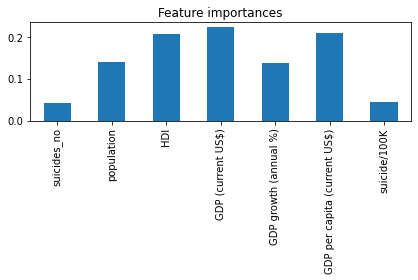

In [644]:
#plotting the feature importance
imp_series = pd.Series(var_imp_emp, index=x_emp_train.columns)

fig, ax = plt.subplots()
imp_series.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

### We can see that HDI,GDP and GDP Growth are important factors when looking at employability rate

- Even after using a Random Forest Predictor and hypertuning our parameters - We can see that none of the attributes help us predict Employment Rates very well - as none of the models are a suitable fit for our data. 



### Looking at Different Models for Employability Rate

In [645]:
# Regression Models

print("Train R-squared: ", lm_emp.score(x_emp_train,Y_emp_train))
print('Train MSE: %.2f'% mean_squared_error(Y_emp_train, lm_emp.predict(x_emp_train))+"\n")

print("Testing R-squared: ", lm_emp.score(x_emp_test_2015,Y_emp_test_2015))
print('Test MSE: %.2f'% mean_squared_error(Y_emp_test_2015, lm_emp.predict(x_emp_test_2015)))
print("\n")
print("Ridge - Train Accuracy:",model_ridgeCV_emp.score(x_emp_train,Y_emp_train))
print("Ridge - Test Accuracy:",model_ridgeCV_emp.score(x_emp_test_2015,Y_emp_test_2015))
print("\n")
print("Lasso Train Score "+str(model_lassoCV_emp.score(x_emp_train,Y_emp_train)))
print("Lasso Test Score "+str(model_lassoCV_emp.score(x_emp_test_2015,Y_emp_test_2015)))

Train R-squared:  0.08704163882371785
Train MSE: 22.81

Testing R-squared:  0.05132227849660931
Test MSE: 29.98


Ridge - Train Accuracy: 0.06290047867574255
Ridge - Test Accuracy: 0.034677581952912595


Lasso Train Score 0.07475323072333973
Lasso Test Score 0.04288199985252572


In [646]:
# Tree Models

print("Decision Tree Train score",dt_emp.score(x_emp_train,Y_emp_train))
print("Decision Tree Test score",dt_emp.score(x_emp_test_2015,Y_emp_test_2015))
print("\n")
print("Random Forest R Squared Train",rf_reg_emp.score(x_emp_train,Y_emp_train))
print("Random Forest R Squared Test",rf_reg_emp.score(x_emp_test_2015,Y_emp_test_2015))

print("Random Forest MSE")
best_grid_emp = grid_results_emp.best_estimator_
grid_accuracy = evaluate(best_grid_emp, x_emp_test_2015,Y_emp_test_2015)

Decision Tree Train score 0.36421510807827506
Decision Tree Test score 0.09571658963051388


Random Forest R Squared Train 0.962295760274496
Random Forest R Squared Test 0.1989202850162618
Random Forest MSE
Mean Absolute Error: 3.14276388503313
Mean Squared Error: 25.319805855910325
Root Mean Squared Error: 5.031878958789681


### From these results we can see that Random forest gives us the best result but even that is unsatisfactory.

# Question 3 : Predicting for Life expectancy

In [647]:
final_df_two

,country,year,sex,age,suicides_no,population,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
96,Albania,2000,female,15-24 years,6.0,263900.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
97,Albania,2000,female,25-34 years,3.0,245800.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
98,Albania,2000,female,35-54 years,5.0,332200.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
99,Albania,2000,female,5-14 years,0.0,324700.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
100,Albania,2000,female,55-74 years,0.0,168000.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13879,Uruguay,2014,male,25-34 years,81.0,234529.0,0.803,5.723601e+10,3.238791,16831.948190,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13880,Uruguay,2014,male,35-54 years,150.0,421245.0,0.803,5.723601e+10,3.238791,16831.948190,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13881,Uruguay,2014,male,5-14 years,1.0,253946.0,0.803,5.723601e+10,3.238791,16831.948190,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13882,Uruguay,2014,male,55-74 years,95.0,272749.0,0.803,5.723601e+10,3.238791,16831.948190,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5


In [648]:
#looking at the number of values that are in each year
final_df_two.year.value_counts()

2011    456
2010    444
2012    432
2009    432
2013    420
2006    420
2008    408
2014    408
2007    408
2003    396
2004    372
2005    372
2002    348
2001    312
2000    288
Name: year, dtype: int64

In [649]:
#assigning data of 2014 to df that will be used for testing
life_expec_2014 = final_df_two[final_df_two.year==2014]
life_expec_2014

,country,year,sex,age,suicides_no,population,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
504,Argentina,2014,female,15-24 years,204.0,3388324.0,0.836,5.260000e+11,-2.512615,12334.79825,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
505,Argentina,2014,female,25-34 years,118.0,3227239.0,0.836,5.260000e+11,-2.512615,12334.79825,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
506,Argentina,2014,female,35-54 years,196.0,5203634.0,0.836,5.260000e+11,-2.512615,12334.79825,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
507,Argentina,2014,female,5-14 years,35.0,3533961.0,0.836,5.260000e+11,-2.512615,12334.79825,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
508,Argentina,2014,female,55-74 years,109.0,3454994.0,0.836,5.260000e+11,-2.512615,12334.79825,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13879,Uruguay,2014,male,25-34 years,81.0,234529.0,0.803,5.723601e+10,3.238791,16831.94819,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13880,Uruguay,2014,male,35-54 years,150.0,421245.0,0.803,5.723601e+10,3.238791,16831.94819,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13881,Uruguay,2014,male,5-14 years,1.0,253946.0,0.803,5.723601e+10,3.238791,16831.94819,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13882,Uruguay,2014,male,55-74 years,95.0,272749.0,0.803,5.723601e+10,3.238791,16831.94819,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5


In [650]:
Y_life_expec_2014 = life_expec_2014.pop('life_expectancy')
Y_life_expec_2014

504      76.2
505      76.2
506      76.2
507      76.2
508      76.2
         ... 
13879    76.8
13880    76.8
13881    76.8
13882    76.8
13883    76.8
Name: life_expectancy, Length: 408, dtype: float64

In [651]:
#dropping columns we wil not need for modeling
x_life_expec_2014 = life_expec_2014.drop(columns=['year','country','sex','age','generation','status'],axis=1)
x_life_expec_2014

,suicides_no,population,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,employement_rate,suicide/100k,adult_mortality,infant_deaths,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
504,204.0,3388324.0,0.836,5.260000e+11,-2.512615,12334.79825,7.27,6.020676,118.0,8.0,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
505,118.0,3227239.0,0.836,5.260000e+11,-2.512615,12334.79825,7.27,3.656376,118.0,8.0,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
506,196.0,5203634.0,0.836,5.260000e+11,-2.512615,12334.79825,7.27,3.766598,118.0,8.0,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
507,35.0,3533961.0,0.836,5.260000e+11,-2.512615,12334.79825,7.27,0.990390,118.0,8.0,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
508,109.0,3454994.0,0.836,5.260000e+11,-2.512615,12334.79825,7.27,3.154854,118.0,8.0,...,62.2,9.0,92.0,4.79,94.0,0.1,1.0,0.9,0.825,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13879,81.0,234529.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.537307,117.0,0.0,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13880,150.0,421245.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,35.608731,117.0,0.0,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13881,1.0,253946.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,0.393785,117.0,0.0,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5
13882,95.0,272749.0,0.803,5.723601e+10,3.238791,16831.94819,6.55,34.830558,117.0,0.0,...,63.4,0.0,95.0,8.58,95.0,0.1,1.5,1.4,0.791,15.5


In [652]:
#finding the rows that were not in 2014
life_expec_train = final_df_two[final_df_two.year!=2014]
life_expec_train

,country,year,sex,age,suicides_no,population,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
96,Albania,2000,female,15-24 years,6.0,263900.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
97,Albania,2000,female,25-34 years,3.0,245800.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
98,Albania,2000,female,35-54 years,5.0,332200.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
99,Albania,2000,female,5-14 years,0.0,324700.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
100,Albania,2000,female,55-74 years,0.0,168000.0,0.671,3.480355e+09,6.950036,1126.683318,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,Uruguay,2013,male,25-34 years,77.0,234385.0,0.800,5.753123e+10,4.637539,16973.689240,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13868,Uruguay,2013,male,35-54 years,118.0,417858.0,0.800,5.753123e+10,4.637539,16973.689240,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13869,Uruguay,2013,male,5-14 years,3.0,255456.0,0.800,5.753123e+10,4.637539,16973.689240,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13870,Uruguay,2013,male,55-74 years,89.0,267909.0,0.800,5.753123e+10,4.637539,16973.689240,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5


In [653]:
#assigning y-train to the values we want to predict, life expectancy
Y_life_expec_train = life_expec_train.pop ('life_expectancy')
Y_life_expec_train

96       72.6
97       72.6
98       72.6
99       72.6
100      72.6
         ... 
13867    76.8
13868    76.8
13869    76.8
13870    76.8
13871    76.8
Name: life_expectancy, Length: 5508, dtype: float64

In [654]:
#dropping columns we will not need and assinging it to our x-train df

x_life_expec_train = life_expec_train.drop(columns=['year','country','sex','age','generation','status'],axis=1)
x_life_expec_train

,suicides_no,population,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,employement_rate,suicide/100k,adult_mortality,infant_deaths,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
96,6.0,263900.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,2.273588,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
97,3.0,245800.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,1.220504,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
98,5.0,332200.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,1.505117,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
99,0.0,324700.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,0.000000,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
100,0.0,168000.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,0.000000,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,77.0,234385.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,32.851932,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13868,118.0,417858.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,28.239258,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13869,3.0,255456.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,1.174371,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13870,89.0,267909.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,33.220235,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5


## Modelling

##### 1. Linear Model

In [655]:
lm_expec = LinearRegression()
lm_expec.fit(x_life_expec_train,Y_life_expec_train)
print("Train R-squared: ", lm_expec.score(x_life_expec_train,Y_life_expec_train))
print('Train MSE: %.2f'% mean_squared_error(Y_life_expec_train, lm_expec.predict(x_life_expec_train))+"\n")

print("Testing R-squared: ", lm_expec.score(x_life_expec_2014,Y_life_expec_2014))
print('Test MSE: %.2f'% mean_squared_error(Y_life_expec_2014, lm_expec.predict(x_life_expec_2014)))

Train R-squared:  0.8500374905305168
Train MSE: 5.36

Testing R-squared:  0.7050335130221095
Test MSE: 9.95


- Not a bad model, we can improve upon this. MSE and r-squared are decent

##### 2. Polynomial Model

In [656]:
lm_poly_expec = LinearRegression()

for i in range(1,5):
    poly = PolynomialFeatures(degree=i)
    X_poltrain = poly.fit_transform(x_life_expec_train)
    X_poltest_2014 = poly.fit_transform(x_life_expec_2014)
    lm_poly_expec.fit(X_poltrain, Y_life_expec_train)
    print("------------")
    print("Degree: ",i)
    print("Train R-squared: ", lm_poly_expec.score(X_poltrain,Y_life_expec_train))
    print('Train MSE: %.2f'% mean_squared_error(Y_life_expec_train, lm_poly_expec.predict(X_poltrain))+"\n")
    print("Testing R-squared: ", lm_poly_expec.score(X_poltest_2014,Y_life_expec_2014))
    print('Test MSE: %.2f'% mean_squared_error(Y_life_expec_2014, lm_poly_expec.predict(X_poltest_2014)))

------------
Degree:  1
Train R-squared:  0.8500374905305165
Train MSE: 5.36

Testing R-squared:  0.7050335160635872
Test MSE: 9.95
------------
Degree:  2
Train R-squared:  -2.272832705631276
Train MSE: 116.98

Testing R-squared:  -5.053226964579207
Test MSE: 204.19
------------
Degree:  3
Train R-squared:  -1.644918029619658
Train MSE: 94.54

Testing R-squared:  -3.057954653131504
Test MSE: 136.89
------------
Degree:  4
Train R-squared:  -0.5682074644781288
Train MSE: 56.05

Testing R-squared:  -1.8092834677888905
Test MSE: 94.76


- Not a bad fit, but don't see much improvement, it only worsens with more degrees

##### 3. Lasso Model

In [657]:
x_life_expec_train

,suicides_no,population,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,employement_rate,suicide/100k,adult_mortality,infant_deaths,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
96,6.0,263900.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,2.273588,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
97,3.0,245800.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,1.220504,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
98,5.0,332200.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,1.505117,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
99,0.0,324700.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,0.000000,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
100,0.0,168000.0,0.671,3.480355e+09,6.950036,1126.683318,16.58,0.000000,11.0,1.0,...,45.0,1.0,97.0,6.26,97.0,0.1,2.1,2.2,0.656,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13867,77.0,234385.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,32.851932,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13868,118.0,417858.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,28.239258,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13869,3.0,255456.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,1.174371,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5
13870,89.0,267909.0,0.800,5.753123e+10,4.637539,16973.689240,6.44,33.220235,117.0,0.0,...,62.9,0.0,94.0,8.68,94.0,0.1,1.5,1.4,0.788,15.5


In [658]:
model_lasso = Lasso(normalize=True)
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_lasso.set_params(alpha=a)
    model_lasso.fit(x_life_expec_train,Y_life_expec_train)
    CV_error = np.mean(cross_val_score(model_lasso, x_life_expec_train,Y_life_expec_train, cv=10, scoring='neg_mean_squared_error'))
    coeficents.append(model_lasso.coef_)
    errors.append(CV_error)

In [659]:
error = np.abs(errors)
print("Min error: ", np.min(error))
lasso_minerr = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])+1
print("Best alpha: ", alphas[index_minerr])

Min error:  7.285185354575868
Best alpha:  [0.0064471]


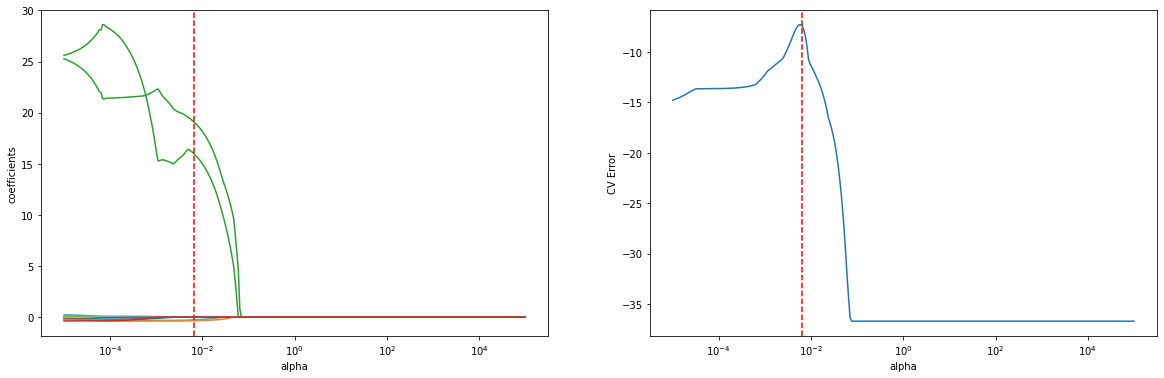

In [660]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

In [661]:
model_lassoCV_expec = LassoCV(cv=10, normalize=True,alphas = np.logspace(-5, 5, 300))
model_lassoCV_expec.fit(x_life_expec_train,Y_life_expec_train)
print("Lasso - alpha: "+str(model_lassoCV_expec.alpha_))
print("Lasso Train Score "+str(model_lassoCV_expec.score(x_life_expec_train,Y_life_expec_train)))
print("Lasso Test Score "+str(model_lassoCV_expec.score(x_life_expec_2014,Y_life_expec_2014)))

Lasso - alpha: 0.005969249509970733
Lasso Train Score 0.8233479513940486
Lasso Test Score 0.675501194231038


- When we incorporate the best shrinking coefficient the testing score is decent but want to improve it. 


##### 4. Ridge Model


In [662]:
model_ridge = Ridge(normalize=True)
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_ridge.set_params(alpha=a)
    model_ridge.fit(x_life_expec_train,Y_life_expec_train)
    CV_error = np.mean(cross_val_score(model_ridge, x_life_expec_train,Y_life_expec_train, cv=10, scoring='neg_mean_squared_error'))
    coeficents.append(model_ridge.coef_)
    errors.append(CV_error)

In [663]:
error = np.abs(errors)
print("Min error: ", np.min(error))
ridge_minError = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])
print("Best alpha: ", alphas[index_minerr])

Min error:  9.57803494627483
Best alpha:  [3.29909369]


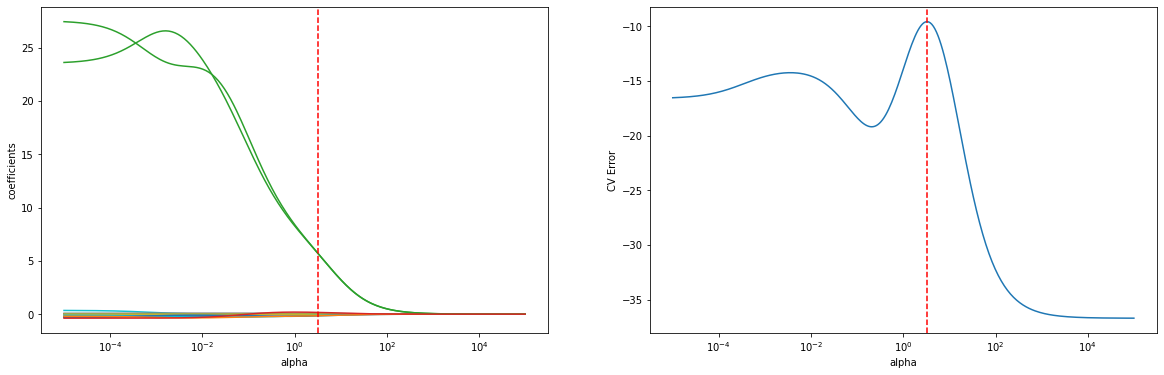

In [664]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV Error')
plt.axis('tight')

plt.show()

In [665]:
model_ridgeCV_expec = RidgeCV(cv=10, normalize=True,scoring="neg_mean_squared_error", alphas = np.logspace(-5, 5, 300))
model_ridgeCV_expec.fit(x_life_expec_train,Y_life_expec_train)

print("Ridge - alpha: "+str(model_ridgeCV_expec.alpha_))
print("Ridge Test Score "+str(model_ridgeCV_expec.score(x_life_expec_2014,Y_life_expec_2014)))

Ridge - alpha: 3.299093687770936
Ridge Test Score 0.49269403325723693


- This model did not do well. Our scores did not improve. Lasso and linear did better.


###### 5. Decision Tree

In [666]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn import tree

dt_expec = DecisionTreeRegressor(max_leaf_nodes=10)
dt_expec = dt_expec.fit(x_life_expec_train,Y_life_expec_train)
#r =export_text(dt_expec, feature_names=x_life_expec_train.columns)


print("Decision Tree Train score",dt_expec.score(x_life_expec_train,Y_life_expec_train))
print("Decision Tree Test score",dt_expec.score(x_life_expec_2014,Y_life_expec_2014))

Decision Tree Train score 0.8952330171439521
Decision Tree Test score 0.6476208121057576


- Test scores is lower than train. This may caused by overfitting or improper model. 


###### 6. Random Forest

In [667]:
# We had more parameters initially but once we got the initial results, we reduced the number of parameters, in the interest
# of time
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,100,150,200,250]
}

In [668]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

dfrst = RandomForestRegressor(random_state=1)
grid_life_expec = GridSearchCV(estimator=dfrst, param_grid=param_grid,cv = 10, n_jobs = -1, verbose = 1)
grid_results_life_expec = grid_life_expec.fit(x_life_expec_train,Y_life_expec_train)


Fitting 10 folds for each of 270 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:  3.3min finished


In [669]:
y_predict_expec = grid_life_expec.predict(x_life_expec_2014)

In [670]:
print(grid_results_life_expec.best_params_)

{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 150}


In [671]:
#Setting the best params and building model
rf_reg_life_expec = RandomForestRegressor(bootstrap= True, max_depth= 80, max_features= 2, min_samples_leaf= 5, 
                               min_samples_split= 8, n_estimators= 50,random_state=1)
rf_reg_life_expec.fit(x_life_expec_train, Y_life_expec_train)

print("R Squared Train",rf_reg_life_expec.score(x_life_expec_train,Y_life_expec_train))
print("R Squared Test",rf_reg_life_expec.score(x_life_expec_2014,Y_life_expec_2014))

R Squared Train 0.9996641189126807
R Squared Test 0.8726985654884194


In [672]:
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics

def evaluate(model, test_features, y_test):
    y_pred = model.predict(test_features)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [673]:
best_grid_life_expec = grid_results_life_expec.best_estimator_
grid_accuracy_emp = evaluate(best_grid_life_expec, x_life_expec_2014, Y_life_expec_2014)

Mean Absolute Error: 1.2600490395071995
Mean Squared Error: 4.33341465748556
Root Mean Squared Error: 2.0816855328040207


In [674]:
#Extracting the feature Importance
var_imp_life_expec = rf_reg_life_expec.feature_importances_
var_imp_life_expec

array([0.00299791, 0.00899675, 0.10454946, 0.02365291, 0.01197561,
       0.12844286, 0.04674052, 0.00105548, 0.08178785, 0.03247266,
       0.03966272, 0.02555387, 0.01241229, 0.01748862, 0.0355587 ,
       0.03377553, 0.02166079, 0.02433879, 0.01933018, 0.0500535 ,
       0.08094566, 0.07442753, 0.083073  , 0.03904682])

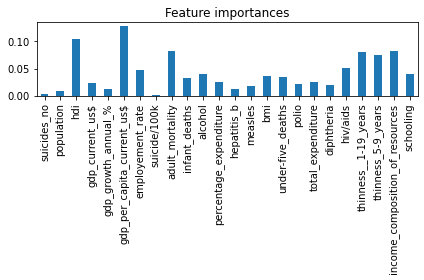

In [675]:
#plotting the feature importance
imp_series = pd.Series(var_imp_life_expec, index=x_life_expec_train.columns)

fig, ax = plt.subplots()
imp_series.plot.bar(ax=ax)
ax.set_title("Feature importances")

fig.tight_layout()

### We can see that HDI,GDP Per capita,adult mortality,income composition and schooling are major factors when determinging life expectancy

 Creating list of predicted values and complementary country

In [676]:
y_predict_expec = y_predict_expec.tolist()

In [677]:
zipped_expec =  list(zip(y_predict_expec, country))

In [678]:
listed_expec = list(zipped_expec)

#### Top 10 countried with highest predicted life expectancy

In [679]:
#taking the first 120 rows that should contain 10 unique countries
top10 = pd.DataFrame(listed_expec[1:120])

In [680]:
#splitting list into 3 seperate columns
top10[['country', 'sex','age']] = pd.DataFrame(top10[1].tolist(), index=top10.index)


In [681]:
#droping columns we dont need
top10 = top10.drop([1, 'sex', 'age'], axis=1)


In [682]:
#renaming column to refer to it later
top10 = top10.rename(columns={0: 'score'})

In [683]:
#Top 10 counties with high predicted life expectancy 
top10.groupby('country').score.max().sort_values(ascending=False)

country
Belgium              84.473839
Austria              84.374656
Australia            82.432299
Chile                80.258474
Cuba                 78.268900
Argentina            76.457235
Brunei Darussalam    75.717518
Colombia             75.001606
Brazil               74.396131
Belize               70.317885
Name: score, dtype: float64

- It appears that the top 10 countries to have a higher life expectancy are Germany, Belgium, Austria, Greece, Portugal, Australia, Spain, Italy, Luxembourg, and France.


#### Bottom 10 countries with low predicted life expectancy

In [684]:
listed_expec.sort()

In [685]:
bottom10 = pd.DataFrame(listed_expec[1:109])

In [686]:
bottom10[['country', 'sex','age']] = pd.DataFrame(bottom10[1].tolist(), index=bottom10.index)


In [687]:
bottom10 = bottom10.drop([1, 'sex', 'age'], axis=1)

In [688]:
bottom10 = bottom10.rename(columns={0: 'score'})

In [689]:
bottom10.groupby('country').score.max().sort_values(ascending=True)


country
South Africa    67.855109
Belize          70.317885
Guatemala       71.660075
Ecuador         73.042556
Nicaragua       73.593036
Mauritius       73.601792
Panama          73.774244
Switzerland     74.259950
Brazil          74.396131
Thailand        74.770134
Name: score, dtype: float64

- It appears that the bottom 10 countries expected to have the lowest life expectancy are South Africa, Belize, Guatemala, El Salvador, Nicaragua, Mauritius, Paraguay, Thailand, Brazil, and Turkey.


#### Evaluating different Models for Life Expectancy

In [690]:
# Regression Models

print("Train R-squared: ", lm_expec.score(x_life_expec_train,Y_life_expec_train))
print('Train MSE: %.2f'% mean_squared_error(Y_life_expec_2014, lm_expec.predict(x_life_expec_2014))+"\n")

print("Testing R-squared: ", lm_expec.score(x_life_expec_2014,Y_life_expec_2014))
print('Test MSE: %.2f'% mean_squared_error(Y_life_expec_2014, lm_expec.predict(x_life_expec_2014)))
print("\n")
print("Ridge - Train Accuracy:",model_ridgeCV_expec.score(x_life_expec_train,Y_life_expec_train))
print("Ridge - Test Accuracy:",model_ridgeCV_expec.score(x_life_expec_2014,Y_life_expec_2014))
print("\n")
print("Lasso Train Score "+str(model_lassoCV_expec.score(x_life_expec_train,Y_life_expec_train)))
print("Lasso Test Score "+str(model_lassoCV_expec.score(x_life_expec_2014,Y_life_expec_2014)))

Train R-squared:  0.8500374905305168
Train MSE: 9.95

Testing R-squared:  0.7050335130221095
Test MSE: 9.95


Ridge - Train Accuracy: 0.7151739433973415
Ridge - Test Accuracy: 0.49269403325723693


Lasso Train Score 0.8233479513940486
Lasso Test Score 0.675501194231038


In [691]:
# Tree Models

print("Decision Tree Train score",dt_expec.score(x_life_expec_train,Y_life_expec_train))
print("Decision Tree Test score",dt_expec.score(x_life_expec_2014,Y_life_expec_2014))
print("\n")
print("Random Forest R Squared Train",rf_reg_life_expec.score(x_life_expec_train,Y_life_expec_train))
print("Random Forest R Squared Test",rf_reg_life_expec.score(x_life_expec_2014,Y_life_expec_2014))

print("Random Forest MSE")
best_grid_emp = grid_results_emp.best_estimator_
grid_accuracy = evaluate(best_grid_emp, x_emp_test_2015,Y_emp_test_2015)

Decision Tree Train score 0.8952330171439521
Decision Tree Test score 0.6476208121057576


Random Forest R Squared Train 0.9996641189126807
Random Forest R Squared Test 0.8726985654884194
Random Forest MSE
Mean Absolute Error: 3.14276388503313
Mean Squared Error: 25.319805855910325
Root Mean Squared Error: 5.031878958789681


### Looking at the different Models we can see that Random forest is best suited due to higher R squared and low MSE

# Question 4 : Classification based on Generation

In [692]:
generation_df = final_df.groupby(['country','year','Generation']).sum()


In [693]:
#Extracting the generation that committted the most number of suicide in a country in a year.
generation_df

suicides_no  population    HDI  GDP (current US$)  \
country year Generation                                                         
Albania 1992 Boomers               11.0    512900.0  1.230       1.304350e+09   
             GI Generation          6.0    387000.0  2.460       2.608700e+09   
             Generation X          16.0   1255700.0  2.460       2.608700e+09   
             Silent                14.0    666900.0  1.230       1.304350e+09   
        1993 Boomers               16.0    491900.0  1.236       2.370631e+09   
...                                 ...         ...    ...                ...   
Uruguay 2014 Silent               198.0    833499.0  3.212       2.289441e+11   
        2015 Boomers              173.0    864438.0  1.612       1.065486e+11   
             Gen Z                  5.0    494107.0  1.612       1.065486e+11   
             Millenials           210.0    987359.0  3.224       2.130972e+11   
             Silent               242.0    844891.0  3.224       2.130972e+11   

                            GDP growth (annual %)  \
country year Generation                             
Albania 1992 Boomers                   -14.374222   
             GI Generation             -28.748444   
             Generation X              -28.748444   
             Silent                    -14.374222   
        1993 Boomers                    19.118823   
...                                           ...   
Uruguay 2014 Silent                     12.955165   
        2015 Boomers                     0.741483   
             Gen Z                       0.741483   
             Millenials                  1.482965   
             Silent                      1.482965   

                            GDP per capita (current US$)  Employement Rate  \
country year Generation                                                      
Albania 1992 Boomers                          401.704440             32.66   
             GI Generation                    803.408879             65.32   
             Generation X                     803.408879             65.32   
             Silent                           401.704440             32.66   
        1993 Boomers                          734.558450             33.04   
...                                                  ...               ...   
Uruguay 2014 Silent                         67327.792760             26.20   
        2015 Boomers                        31227.491940             14.98   
             Gen Z                          31227.491940             14.98   
             Millenials                     62454.983880             29.96   
             Silent                         62454.983880             29.96   

                            suicide/100K  
country year Generation                   
Albania 1992 Boomers            4.347210  
             GI Generation      3.741224  
             Generation X       5.806950  
             Silent             4.109405  
        1993 Boomers            6.585140  
...                                  ...  
Uruguay 2014 Silent           122.733741  
        2015 Boomers           40.469452  
             Gen Z              2.015898  
             Millenials        85.291335  
             Silent           142.254227  

[5052 rows x 8 columns]

In [694]:
#Passing it to a new df to not make changes in final_df
generation_df_new = final_df

In [695]:
#Inputting the max suicide/100K per country per year
generation_df['generation_max_no'] = generation_df.groupby(['country','year']).max()['suicide/100K']

In [696]:
#Finding out the generation which have the biggest share in sucide/100K of a country in a year
generation_df[generation_df['generation_max_no']==generation_df['suicide/100K']]

suicides_no  population    HDI  GDP (current US$)  \
country year Generation                                                         
Albania 1992 Generation X          16.0   1255700.0  2.460       2.608700e+09   
        1993 Generation X          30.0   1235900.0  2.472       4.741262e+09   
        1994 GI Generation         16.0    410500.0  2.496       7.523806e+09   
        1995 GI Generation         14.0    424300.0  2.548       9.571059e+09   
        1996 GI Generation          8.0    429600.0  2.584       1.279857e+10   
...                                 ...         ...    ...                ...   
Uruguay 2010 Silent               229.0    792784.0  3.128       1.611379e+11   
        2012 Silent               227.0    811947.0  3.172       2.050576e+11   
        2013 Silent               200.0    822487.0  3.200       2.301249e+11   
        2014 Silent               198.0    833499.0  3.212       2.289441e+11   
        2015 Silent               242.0    844891.0  3.224       2.130972e+11   

                            GDP growth (annual %)  \
country year Generation                             
Albania 1992 Generation X              -28.748444   
        1993 Generation X               38.237647   
        1994 GI Generation              33.211466   
        1995 GI Generation              53.289333   
        1996 GI Generation              36.399998   
...                                           ...   
Uruguay 2010 Silent                     31.213639   
        2012 Silent                     14.152715   
        2013 Silent                     18.550155   
        2014 Silent                     12.955165   
        2015 Silent                      1.482965   

                            GDP per capita (current US$)  Employement Rate  \
country year Generation                                                      
Albania 1992 Generation X                     803.408879             65.32   
        1993 Generation X                    1469.116900             66.08   
        1994 GI Generation                   2345.665358             66.28   
        1995 GI Generation                   3002.417797             66.28   
        1996 GI Generation                   4039.910672             66.28   
...                                                  ...               ...   
Uruguay 2010 Silent                         47968.095080             28.64   
        2012 Silent                         60686.320680             25.80   
        2013 Silent                         67894.756960             25.76   
        2014 Silent                         67327.792760             26.20   
        2015 Silent                         62454.983880             29.96   

                            suicide/100K  generation_max_no  
country year Generation                                      
Albania 1992 Generation X       5.806950           5.806950  
        1993 Generation X      11.469694          11.469694  
        1994 GI Generation     20.133087          20.133087  
        1995 GI Generation     15.050852          15.050852  
        1996 GI Generation     14.942127          14.942127  
...                                  ...                ...  
Uruguay 2010 Silent           151.342414         151.342414  
        2012 Silent           145.434981         145.434981  
        2013 Silent           135.348946         135.348946  
        2014 Silent           122.733741         122.733741  
        2015 Silent           142.254227         142.254227  

[1200 rows x 9 columns]

In [697]:
df_max_suicide = pd.DataFrame()

In [698]:
#Getting the countries after grouping them by 
df_max_suicide['Country'] = generation_df[generation_df['generation_max_no']==generation_df['suicide/100K']].index.get_level_values(0)

In [699]:
#Getting the year after grouping them by 
df_max_suicide['year'] = generation_df[generation_df['generation_max_no']==generation_df['suicide/100K']].index.get_level_values(1)

In [700]:
#Getting the Generation after grouping them by 
df_max_suicide['Generation'] = generation_df[generation_df['generation_max_no']==generation_df['suicide/100K']].index.get_level_values(2)

In [701]:
#This df gives us the Generation which had the highest suicide/100K for a country for a particular year
df_max_suicide

,Country,year,Generation
0,Albania,1992,Generation X
1,Albania,1993,Generation X
2,Albania,1994,GI Generation
3,Albania,1995,GI Generation
4,Albania,1996,GI Generation
...,...,...,...
1195,Uruguay,2010,Silent
1196,Uruguay,2012,Silent
1197,Uruguay,2013,Silent
1198,Uruguay,2014,Silent


In [702]:
df_max_suicide['Generation'].value_counts()

Silent           552
GI Generation    433
Generation X     139
Boomers           39
Millenials        34
Gen Z              3
Name: Generation, dtype: int64

In [703]:
#Creating a datframe for putting in aggregated data for total no. of suicides and suicide/100K
# in a country for a particular year
df_suicide_agg = pd.DataFrame()

In [704]:
generation_df_new_agg = generation_df_new.groupby(['country','year','HDI','GDP (current US$)','GDP growth (annual %)','GDP per capita (current US$)','Employement Rate']).agg({'suicides_no': np.sum, 'population': np.sum, 'suicide/100K': np.sum})

In [705]:
generation_df_new_agg = generation_df_new_agg.reset_index()

In [706]:
generation_df_new_agg

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K
0,Albania,1992,0.615,6.521750e+08,-7.187111,200.852220,16.33,47.0,2822500.0,18.004789
1,Albania,1993,0.618,1.185315e+09,9.559412,367.279225,16.52,73.0,2807300.0,32.577653
2,Albania,1994,0.624,1.880952e+09,8.302867,586.416340,16.57,50.0,2849300.0,32.192022
3,Albania,1995,0.637,2.392765e+09,13.322333,750.604449,16.57,88.0,2903400.0,40.566478
4,Albania,1996,0.646,3.199643e+09,9.099999,1009.977668,16.57,89.0,2940200.0,43.620296
...,...,...,...,...,...,...,...,...,...,...
1153,Uruguay,2010,0.782,4.028448e+10,7.803410,11992.023770,7.16,547.0,3127306.0,257.429409
1154,Uruguay,2012,0.793,5.126439e+10,3.538179,15171.580170,6.45,599.0,3151939.0,264.346717
1155,Uruguay,2013,0.800,5.753123e+10,4.637539,16973.689240,6.44,546.0,3164670.0,249.090911
1156,Uruguay,2014,0.803,5.723601e+10,3.238791,16831.948190,6.55,591.0,3177645.0,248.637403


In [707]:
#Creating a new column to have the generation which had the most numer of suicides in a country in a year
generation_df_new_agg['Generation_max_suicide'] = 'test'

In [708]:
generation_df_new_agg

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K,Generation_max_suicide
0,Albania,1992,0.615,6.521750e+08,-7.187111,200.852220,16.33,47.0,2822500.0,18.004789,test
1,Albania,1993,0.618,1.185315e+09,9.559412,367.279225,16.52,73.0,2807300.0,32.577653,test
2,Albania,1994,0.624,1.880952e+09,8.302867,586.416340,16.57,50.0,2849300.0,32.192022,test
3,Albania,1995,0.637,2.392765e+09,13.322333,750.604449,16.57,88.0,2903400.0,40.566478,test
4,Albania,1996,0.646,3.199643e+09,9.099999,1009.977668,16.57,89.0,2940200.0,43.620296,test
...,...,...,...,...,...,...,...,...,...,...,...
1153,Uruguay,2010,0.782,4.028448e+10,7.803410,11992.023770,7.16,547.0,3127306.0,257.429409,test
1154,Uruguay,2012,0.793,5.126439e+10,3.538179,15171.580170,6.45,599.0,3151939.0,264.346717,test
1155,Uruguay,2013,0.800,5.753123e+10,4.637539,16973.689240,6.44,546.0,3164670.0,249.090911,test
1156,Uruguay,2014,0.803,5.723601e+10,3.238791,16831.948190,6.55,591.0,3177645.0,248.637403,test


In [709]:
df_max_suicide

,Country,year,Generation
0,Albania,1992,Generation X
1,Albania,1993,Generation X
2,Albania,1994,GI Generation
3,Albania,1995,GI Generation
4,Albania,1996,GI Generation
...,...,...,...
1195,Uruguay,2010,Silent
1196,Uruguay,2012,Silent
1197,Uruguay,2013,Silent
1198,Uruguay,2014,Silent


In [710]:
#for loop is creating a new column that represents the generation that had the highest suicides in that year
for j in range(0,len(generation_df_new_agg)):
    for i in range(0,len(df_max_suicide)):
        #Checking country and year which match with our main database
        if(generation_df_new_agg.iloc[j,0]==df_max_suicide.iloc[i,0] and generation_df_new_agg.iloc[j,1]==df_max_suicide.iloc[i,1] ):
            generation_df_new_agg.iloc[j,10]=df_max_suicide.iloc[i,2]

In [711]:
generation_df_new_agg

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K,Generation_max_suicide
0,Albania,1992,0.615,6.521750e+08,-7.187111,200.852220,16.33,47.0,2822500.0,18.004789,Generation X
1,Albania,1993,0.618,1.185315e+09,9.559412,367.279225,16.52,73.0,2807300.0,32.577653,Generation X
2,Albania,1994,0.624,1.880952e+09,8.302867,586.416340,16.57,50.0,2849300.0,32.192022,GI Generation
3,Albania,1995,0.637,2.392765e+09,13.322333,750.604449,16.57,88.0,2903400.0,40.566478,GI Generation
4,Albania,1996,0.646,3.199643e+09,9.099999,1009.977668,16.57,89.0,2940200.0,43.620296,GI Generation
...,...,...,...,...,...,...,...,...,...,...,...
1153,Uruguay,2010,0.782,4.028448e+10,7.803410,11992.023770,7.16,547.0,3127306.0,257.429409,Silent
1154,Uruguay,2012,0.793,5.126439e+10,3.538179,15171.580170,6.45,599.0,3151939.0,264.346717,Silent
1155,Uruguay,2013,0.800,5.753123e+10,4.637539,16973.689240,6.44,546.0,3164670.0,249.090911,Silent
1156,Uruguay,2014,0.803,5.723601e+10,3.238791,16831.948190,6.55,591.0,3177645.0,248.637403,Silent


In [712]:
#assinging x_test to vlaues in 2015 and dropping columns not needed for models
classifier_test_x = generation_df_new_agg[generation_df_new_agg['year']==2015].drop(columns=['country','year'])

In [713]:
#assinging x train to vlaues not in 2015 and dropping columns not needed for models
classifier_train_x = generation_df_new_agg[generation_df_new_agg['year']!=2015].drop(columns=['country','year'])

## Handling imbalance

In [714]:
og_classifier_test_x = classifier_test_x
classifier_test_x.Generation_max_suicide.value_counts()

Silent        27
Millenials     9
Name: Generation_max_suicide, dtype: int64

In [715]:
classifier_train_x.Generation_max_suicide.value_counts()

Silent           525
GI Generation    430
Generation X     127
Boomers           27
Millenials        13
Name: Generation_max_suicide, dtype: int64

### Adding minority data to both test and train to handle the imbalance

In [716]:
silent_train = classifier_train_x[classifier_train_x.Generation_max_suicide=='Silent']

In [717]:
gi_gen_train = classifier_train_x[classifier_train_x.Generation_max_suicide=='GI Generation']

In [718]:
gen_x_train = classifier_train_x[classifier_train_x.Generation_max_suicide=='Generation X']

In [719]:
boomers_train = classifier_train_x[classifier_train_x.Generation_max_suicide=='Boomers']

In [720]:
millenials_train = classifier_train_x[classifier_train_x.Generation_max_suicide=='Millenials']

In [721]:
from sklearn.utils import resample

gi_gen_train_upsampled = resample(gi_gen_train,
                          replace=True, # sample with replacement
                          n_samples=len(silent_train), # match number in majority class
                          random_state=27) # reproducible results

gen_x_train_upsampled = resample(gen_x_train,
                          replace=True, # sample with replacement
                          n_samples=len(silent_train), # match number in majority class
                          random_state=27) # reproducible results

boomers_train_upsampled = resample(boomers_train,
                          replace=True, # sample with replacement
                          n_samples=len(silent_train), # match number in majority class
                          random_state=27) # reproducible results

millenials_train_upsampled = resample(millenials_train,
                          replace=True, # sample with replacement
                          n_samples=len(silent_train), # match number in majority class
                          random_state=27) # reproducible results

In [722]:
#Concating all the upsampled datasets into one dataframe
classified_upsampled_train = pd.concat([silent_train, gi_gen_train_upsampled,gen_x_train_upsampled,boomers_train_upsampled,millenials_train_upsampled])

In [723]:
classified_upsampled_train

,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K,Generation_max_suicide
11,0.691,5.611492e+09,5.530051,1846.118813,16.61,124.0,2843929.0,58.597652,Silent
13,0.706,8.052076e+09,5.529915,2673.787283,16.40,0.0,2783320.0,0.000000,Silent
14,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000,Silent
15,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867,Silent
16,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395,Silent
...,...,...,...,...,...,...,...,...,...
107,0.801,2.877660e+10,1.983515,22514.202720,1.18,18.0,1103462.0,14.957607,Millenials
401,0.726,6.955537e+10,3.525299,4633.591284,4.09,912.0,13360285.0,81.473224,Millenials
107,0.801,2.877660e+10,1.983515,22514.202720,1.18,18.0,1103462.0,14.957607,Millenials
109,0.815,3.253947e+10,5.416840,24744.296960,1.22,5.0,1214492.0,2.493247,Millenials


### Doing the same upsampling for test

In [724]:
silent_test = classifier_test_x[classifier_test_x.Generation_max_suicide=='Silent']

In [725]:
millenials_test = classifier_test_x[classifier_test_x.Generation_max_suicide=='Millenials']

In [726]:
from sklearn.utils import resample
# In the test dataset there is only millinials and silent,hence only upsampling millenials
millenials_test_upsampled = resample(millenials_test,
                          replace=True, # sample with replacement
                          n_samples=len(silent_test), # match number in majority class
                          random_state=27) # reproducible results

In [727]:
# Concating all the upsampled datasets to a final dataset
classified_upsampled_test = pd.concat([silent_test,millenials_test_upsampled])

In [728]:
classifier_test_y = classified_upsampled_test.pop('Generation_max_suicide')

In [729]:
classifier_test_y

43          Silent
67          Silent
92          Silent
154         Silent
178         Silent
203         Silent
272         Silent
297         Silent
345         Silent
381         Silent
465         Silent
514         Silent
539         Silent
635         Silent
671         Silent
696         Silent
796         Silent
850         Silent
870         Silent
953         Silent
998         Silent
1032        Silent
1053        Silent
1076        Silent
1104        Silent
1135        Silent
1157        Silent
564     Millenials
973     Millenials
973     Millenials
973     Millenials
223     Millenials
746     Millenials
973     Millenials
359     Millenials
406     Millenials
359     Millenials
359     Millenials
721     Millenials
771     Millenials
564     Millenials
564     Millenials
223     Millenials
746     Millenials
564     Millenials
564     Millenials
771     Millenials
825     Millenials
406     Millenials
825     Millenials
973     Millenials
746     Millenials
825     Mill

In [730]:
classifier_test_y.value_counts()

Silent        27
Millenials    27
Name: Generation_max_suicide, dtype: int64

In [731]:
classifier_test_x = classified_upsampled_test

In [732]:
classifier_test_x

,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K
43,0.840,5.950000e+11,2.731160,13789.060420,7.61,3073.0,39699624.0,112.130397
67,0.938,1.350000e+12,2.192647,56755.721710,6.05,3027.0,22240785.0,154.191621
92,0.915,3.820000e+11,1.014502,44178.047380,5.72,1251.0,8219386.0,194.609786
154,0.922,4.620000e+11,2.041459,40991.808140,8.48,1867.0,10624356.0,196.666130
178,0.710,1.721701e+09,2.633690,4770.232656,7.58,26.0,319835.0,135.474707
203,0.756,1.800000e+12,-3.545763,8814.001418,8.43,11163.0,191087085.0,77.441845
272,0.842,2.440000e+11,2.303767,13574.169240,6.51,1838.0,16565725.0,147.686955
297,0.756,2.930000e+11,2.955901,6175.876030,8.30,2332.0,44490427.0,70.388852
345,0.772,8.713300e+10,4.438142,7694.014637,2.40,1511.0,10832068.0,194.314060
381,0.933,3.030000e+11,2.342591,53254.856370,6.28,564.0,5383060.0,121.411780


In [733]:
classifier_train_y = classified_upsampled_train.pop('Generation_max_suicide')

In [734]:
classifier_train_x = classified_upsampled_train

In [735]:
classifier_train_x

,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K
11,0.691,5.611492e+09,5.530051,1846.118813,16.61,124.0,2843929.0,58.597652
13,0.706,8.052076e+09,5.529915,2673.787283,16.40,0.0,2783320.0,0.000000
14,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000
15,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867
16,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395
...,...,...,...,...,...,...,...,...
107,0.801,2.877660e+10,1.983515,22514.202720,1.18,18.0,1103462.0,14.957607
401,0.726,6.955537e+10,3.525299,4633.591284,4.09,912.0,13360285.0,81.473224
107,0.801,2.877660e+10,1.983515,22514.202720,1.18,18.0,1103462.0,14.957607
109,0.815,3.253947e+10,5.416840,24744.296960,1.22,5.0,1214492.0,2.493247


In [736]:
classifier_train_y

11         Silent
13         Silent
14         Silent
15         Silent
16         Silent
          ...    
107    Millenials
401    Millenials
107    Millenials
109    Millenials
110    Millenials
Name: Generation_max_suicide, Length: 2625, dtype: object

In [737]:
classifier_train_y.value_counts()

Generation X     525
Silent           525
Boomers          525
GI Generation    525
Millenials       525
Name: Generation_max_suicide, dtype: int64

In [738]:
classifier_test_y.value_counts()

Silent        27
Millenials    27
Name: Generation_max_suicide, dtype: int64

### Modelling

#### KNN

In [739]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

knn_hf = KNeighborsClassifier()
knn_hf.fit(classifier_train_x, classifier_train_y)
classifier_pred_y= knn_hf.predict(classifier_test_x)

In [740]:
from sklearn.metrics import classification_report, accuracy_score
accuracy_score(classifier_test_y,classifier_pred_y)

0.25925925925925924

In [741]:
print(confusion_matrix(classifier_test_y, classifier_pred_y))
print(classification_report(classifier_test_y, classifier_pred_y))

[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 5 10  0 12]
 [ 5  7  1 14]]
               precision    recall  f1-score   support

GI Generation       0.00      0.00      0.00         0
 Generation X       0.00      0.00      0.00         0
   Millenials       0.00      0.00      0.00        27
       Silent       0.54      0.52      0.53        27

     accuracy                           0.26        54
    macro avg       0.13      0.13      0.13        54
 weighted avg       0.27      0.26      0.26        54



- KNN model did not do well. It was only able to classify 26% of the time accurately. 


#### Naive Bayes

In [742]:
from sklearn.naive_bayes import GaussianNB

In [743]:
gnb = GaussianNB()
gnb_pred_y = gnb.fit(classifier_train_x, classifier_train_y).predict(classifier_test_x)

print(confusion_matrix(classifier_test_y, gnb_pred_y))
print(classification_report(classifier_test_y, gnb_pred_y))

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [13  0  5  7  2]
 [ 4  4  9  2  8]]
               precision    recall  f1-score   support

      Boomers       0.00      0.00      0.00         0
GI Generation       0.00      0.00      0.00         0
 Generation X       0.00      0.00      0.00         0
   Millenials       0.78      0.26      0.39        27
       Silent       0.80      0.30      0.43        27

     accuracy                           0.28        54
    macro avg       0.32      0.11      0.16        54
 weighted avg       0.79      0.28      0.41        54



In [744]:
accuracy_score(classifier_test_y,gnb_pred_y)

0.2777777777777778

- Naive bayes also did not do well at classifying. It has an equally  worse accuracy scorea on low precision and recall. 


#### Random Forest

In [745]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [746]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [20, 50, 100, 150,200]
}

clf = GridSearchCV(rfc, param_grid, cv = 10, scoring='accuracy',n_jobs=-1,verbose=1)

clf.fit(classifier_train_x, classifier_train_y)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1298 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 2498 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:  1.8min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [20, 50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [747]:
print(clf.best_params_)

print(clf.best_score_)

{'bootstrap': True, 'max_depth': 15, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 20}
0.871990828084637


In [748]:
print("R Squared Train",clf.score(classifier_train_x,classifier_train_y))
print("R Squared Test",clf.score(classifier_test_x,classifier_test_y))

R Squared Train 0.9866666666666667
R Squared Test 0.48148148148148145


In [749]:
rfc_predict_train = clf.predict(classifier_train_x)

print("=== Confusion Matrix ===")
print(confusion_matrix(classifier_train_y, rfc_predict_train))
print('\n')
print("=== Classification Report ===")
print(classification_report(classifier_train_y, rfc_predict_train))
print('\n')

=== Confusion Matrix ===
[[525   0   0   0   0]
 [  4 515   5   0   1]
 [  0   0 523   0   2]
 [  0   0   0 525   0]
 [  3   7  11   2 502]]


=== Classification Report ===
               precision    recall  f1-score   support

      Boomers       0.99      1.00      0.99       525
GI Generation       0.99      0.98      0.98       525
 Generation X       0.97      1.00      0.98       525
   Millenials       1.00      1.00      1.00       525
       Silent       0.99      0.96      0.97       525

     accuracy                           0.99      2625
    macro avg       0.99      0.99      0.99      2625
 weighted avg       0.99      0.99      0.99      2625





- We can see that the train did better at classifying

In [750]:
rfc_predict = clf.predict(classifier_test_x)

print("=== Confusion Matrix ===")
print(confusion_matrix(classifier_test_y, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(classifier_test_y, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 2  0  3  0 22]
 [ 0  1  0  0 26]]


=== Classification Report ===
               precision    recall  f1-score   support

      Boomers       0.00      0.00      0.00         0
GI Generation       0.00      0.00      0.00         0
 Generation X       0.00      0.00      0.00         0
   Millenials       0.00      0.00      0.00        27
       Silent       0.54      0.96      0.69        27

     accuracy                           0.48        54
    macro avg       0.11      0.19      0.14        54
 weighted avg       0.27      0.48      0.35        54





In [751]:
rfc_predict

array(['Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'GI Generation', 'Silent', 'Silent', 'Silent',
       'Silent', 'Boomers', 'Generation X', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Boomers', 'Generation X', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Generation X', 'Silent', 'Silent'],
      dtype=object)

In [752]:
classifier_test_y.value_counts()

Silent        27
Millenials    27
Name: Generation_max_suicide, dtype: int64

#### Evaluating Different Models

In [753]:
# KNN Model
print(confusion_matrix(classifier_test_y, classifier_pred_y))
print(classification_report(classifier_test_y, classifier_pred_y))

[[ 0  0  0  0]
 [ 0  0  0  0]
 [ 5 10  0 12]
 [ 5  7  1 14]]
               precision    recall  f1-score   support

GI Generation       0.00      0.00      0.00         0
 Generation X       0.00      0.00      0.00         0
   Millenials       0.00      0.00      0.00        27
       Silent       0.54      0.52      0.53        27

     accuracy                           0.26        54
    macro avg       0.13      0.13      0.13        54
 weighted avg       0.27      0.26      0.26        54



In [754]:
# NB Model
gnb = GaussianNB()
gnb_pred_y = gnb.fit(classifier_train_x, classifier_train_y).predict(classifier_test_x)

print(confusion_matrix(classifier_test_y, gnb_pred_y))
print(classification_report(classifier_test_y, gnb_pred_y))

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [13  0  5  7  2]
 [ 4  4  9  2  8]]
               precision    recall  f1-score   support

      Boomers       0.00      0.00      0.00         0
GI Generation       0.00      0.00      0.00         0
 Generation X       0.00      0.00      0.00         0
   Millenials       0.78      0.26      0.39        27
       Silent       0.80      0.30      0.43        27

     accuracy                           0.28        54
    macro avg       0.32      0.11      0.16        54
 weighted avg       0.79      0.28      0.41        54



In [755]:
#Random Forest Classifier
rfc_predict = clf.predict(classifier_test_x)

print("=== Confusion Matrix ===")
print(confusion_matrix(classifier_test_y, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(classifier_test_y, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 2  0  3  0 22]
 [ 0  1  0  0 26]]


=== Classification Report ===
               precision    recall  f1-score   support

      Boomers       0.00      0.00      0.00         0
GI Generation       0.00      0.00      0.00         0
 Generation X       0.00      0.00      0.00         0
   Millenials       0.00      0.00      0.00        27
       Silent       0.54      0.96      0.69        27

     accuracy                           0.48        54
    macro avg       0.11      0.19      0.14        54
 weighted avg       0.27      0.48      0.35        54





### Amongst all the models,looking at  the metric (recall) Random forest classifier does the best job of classifying.
- Then KNN and lastly Naive Bayes

In [756]:
rfc_predict

array(['Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'GI Generation', 'Silent', 'Silent', 'Silent',
       'Silent', 'Boomers', 'Generation X', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Silent', 'Silent', 'Silent',
       'Boomers', 'Generation X', 'Silent', 'Silent', 'Silent', 'Silent',
       'Silent', 'Silent', 'Silent', 'Generation X', 'Silent', 'Silent'],
      dtype=object)

In [757]:
#finding the most common generation in our prediction for 2015
from scipy import stats

stats.mode(rfc_predict)

ModeResult(mode=array(['Silent'], dtype=object), count=array([48]))

### We see that silent generation is most susceptible to commit suicide in 2015 in majority of the countries in our dataset

In [758]:
# The original data before over sampling
og_classifier_test_x.Generation_max_suicide.value_counts()

Silent        27
Millenials     9
Name: Generation_max_suicide, dtype: int64

### There is class imbalance but we handled it and our model corroborates what was in our original data
- That the silent generation is most susceptible to commiting suicide in 2015.

# Question 5 : Drawing Inferences from suicides around the  2008 Financial Crisis

In [759]:
#Extracting around the years of the financial crisis
final_2008 = final_df[(final_df['year'] >= 2006) & (final_df['year'] < 2011) ]

In [760]:
final_2008

,country,year,sex,age,suicides_no,population,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicide/100K,Generation
204,Albania,2006,female,15-24 years,0.0,283138.0,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.000000,Millenials
205,Albania,2006,female,25-34 years,0.0,186391.0,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.000000,Generation X
206,Albania,2006,female,35-54 years,0.0,388746.0,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.000000,Boomers
207,Albania,2006,female,5-14 years,0.0,267316.0,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.000000,Millenials
208,Albania,2006,female,55-74 years,0.0,215907.0,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.000000,Silent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,Uruguay,2010,male,25-34 years,77.0,236974.0,0.782,4.028448e+10,7.803410,11992.023770,7.16,32.493016,Generation X
35060,Uruguay,2010,male,35-54 years,101.0,406214.0,0.782,4.028448e+10,7.803410,11992.023770,7.16,24.863742,Boomers
35061,Uruguay,2010,male,5-14 years,1.0,261266.0,0.782,4.028448e+10,7.803410,11992.023770,7.16,0.382752,Millenials
35062,Uruguay,2010,male,55-74 years,106.0,256883.0,0.782,4.028448e+10,7.803410,11992.023770,7.16,41.263922,Silent


In [761]:
#Extracting around the years of the financial crisis
final_df_two_2008 = final_df_two[(final_df_two['year'] >= 2006) & (final_df_two['year'] < 2011) ]

In [762]:
final_df_two_2008

,country,year,sex,age,suicides_no,population,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
168,Albania,2006,female,15-24 years,0.0,283138.0,0.713,8.896074e+09,5.900084,2972.743265,...,5.8,1.0,97.0,5.86,97.0,0.1,1.7,1.8,0.696,11.4
169,Albania,2006,female,25-34 years,0.0,186391.0,0.713,8.896074e+09,5.900084,2972.743265,...,5.8,1.0,97.0,5.86,97.0,0.1,1.7,1.8,0.696,11.4
170,Albania,2006,female,35-54 years,0.0,388746.0,0.713,8.896074e+09,5.900084,2972.743265,...,5.8,1.0,97.0,5.86,97.0,0.1,1.7,1.8,0.696,11.4
171,Albania,2006,female,5-14 years,0.0,267316.0,0.713,8.896074e+09,5.900084,2972.743265,...,5.8,1.0,97.0,5.86,97.0,0.1,1.7,1.8,0.696,11.4
172,Albania,2006,female,55-74 years,0.0,215907.0,0.713,8.896074e+09,5.900084,2972.743265,...,5.8,1.0,97.0,5.86,97.0,0.1,1.7,1.8,0.696,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13843,Uruguay,2010,male,25-34 years,77.0,236974.0,0.782,4.028448e+10,7.803410,11992.023770,...,61.2,1.0,95.0,8.63,95.0,0.1,1.5,1.5,0.777,15.6
13844,Uruguay,2010,male,35-54 years,101.0,406214.0,0.782,4.028448e+10,7.803410,11992.023770,...,61.2,1.0,95.0,8.63,95.0,0.1,1.5,1.5,0.777,15.6
13845,Uruguay,2010,male,5-14 years,1.0,261266.0,0.782,4.028448e+10,7.803410,11992.023770,...,61.2,1.0,95.0,8.63,95.0,0.1,1.5,1.5,0.777,15.6
13846,Uruguay,2010,male,55-74 years,106.0,256883.0,0.782,4.028448e+10,7.803410,11992.023770,...,61.2,1.0,95.0,8.63,95.0,0.1,1.5,1.5,0.777,15.6


In [763]:
#grouping by several columns
final_2008_grouped = final_2008.groupby(['country','year','HDI','GDP (current US$)','GDP growth (annual %)','GDP per capita (current US$)','Employement Rate']).sum().reset_index()

In [764]:
#grouping by several columns
final_df_two_2008_grouped = final_df_two_2008.groupby(['country','year','hdi','gdp_current_us$','gdp_growth_annual_%','gdp_per_capita_current_us$','employement_rate']).sum().reset_index()

In [765]:
final_2008_grouped.head(10)

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K
0,Albania,2006,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000
1,Albania,2007,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867
2,Albania,2008,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395
3,Albania,2009,0.733,1.204422e+10,3.350067,4114.140114,13.67,0.0,2745735.0,0.000000
4,Albania,2010,0.745,1.192693e+10,3.706892,4094.350334,14.09,96.0,2736025.0,41.658867
5,Argentina,2006,0.812,2.330000e+11,8.047152,5919.012338,10.08,3108.0,35918886.0,128.209542
6,Argentina,2007,0.817,2.880000e+11,9.007651,7245.446857,8.47,2946.0,36315492.0,118.345680
7,Argentina,2008,0.821,3.620000e+11,4.057233,9020.873323,7.84,3059.0,36733520.0,118.119692
8,Argentina,2009,0.821,3.330000e+11,-5.918525,8225.137583,8.65,2884.0,37158001.0,107.313038
9,Argentina,2010,0.829,4.240000e+11,10.125398,10385.964430,7.71,2943.0,37578454.0,111.235542


In [766]:
final_df_two_2008_grouped.head(10)

,country,year,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,employement_rate,suicides_no,population,suicide/100k,...,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Albania,2006,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000,...,69.6,12.0,1164.0,70.32,1164.0,1.2,20.4,21.6,8.352,136.8
1,Albania,2007,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867,...,620.4,12.0,1188.0,73.20,1176.0,1.2,19.2,20.4,8.436,139.2
2,Albania,2008,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395,...,631.2,12.0,1188.0,70.44,1188.0,1.2,19.2,19.2,8.556,144.0
3,Albania,2009,0.733,1.204422e+10,3.350067,4114.140114,13.67,0.0,2745735.0,0.000000,...,642.0,12.0,1176.0,69.48,1176.0,1.2,18.0,19.2,8.652,146.4
4,Albania,2010,0.745,1.192693e+10,3.706892,4094.350334,14.09,96.0,2736025.0,41.658867,...,651.6,12.0,1188.0,64.08,1188.0,1.2,16.8,18.0,8.700,150.0
5,Argentina,2006,0.812,2.330000e+11,8.047152,5919.012338,10.08,3108.0,35918886.0,128.209542,...,690.0,144.0,1104.0,80.16,1092.0,1.2,13.2,10.8,9.384,193.2
6,Argentina,2007,0.817,2.880000e+11,9.007651,7245.446857,8.47,2946.0,36315492.0,118.345680,...,696.0,144.0,1104.0,77.88,1092.0,1.2,13.2,10.8,9.456,195.6
7,Argentina,2008,0.821,3.620000e+11,4.057233,9020.873323,7.84,3059.0,36733520.0,118.119692,...,703.2,132.0,1128.0,79.92,1116.0,1.2,12.0,10.8,9.504,195.6
8,Argentina,2009,0.821,3.330000e+11,-5.918525,8225.137583,8.65,2884.0,37158001.0,107.313038,...,710.4,132.0,1164.0,91.56,1128.0,1.2,12.0,10.8,9.528,198.0
9,Argentina,2010,0.829,4.240000e+11,10.125398,10385.964430,7.71,2943.0,37578454.0,111.235542,...,717.6,132.0,1140.0,78.60,1128.0,1.2,12.0,10.8,9.624,201.6


In [767]:
#top 10 countries with most suicides in 2008 during the financial crisis
final_2008_grouped[final_2008_grouped['year'] == 2008].sort_values(by='suicides_no',ascending=False).head(10)

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K
144,Japan,2008,0.883,5.110000e+12,-1.224289,39876.303970,4.00,30073.0,120602000.0,265.296356
106,France,2008,0.875,2.920000e+12,0.254946,45334.117960,7.06,10353.0,58482967.0,216.216925
111,Germany,2008,0.924,3.730000e+12,0.959879,45427.151680,7.53,9459.0,78662789.0,145.525381
42,Brazil,2008,0.717,1.700000e+12,5.094195,8831.023117,7.34,9184.0,177471632.0,72.220229
164,Mexico,2008,0.748,1.110000e+12,1.143585,10016.571210,3.87,4642.0,102170587.0,60.818511
247,United Kingdom,2008,0.903,2.920000e+12,-0.278780,47267.012180,5.62,4259.0,57683372.0,80.724526
136,Italy,2008,0.876,2.400000e+12,-0.962013,40778.342740,6.72,3904.0,57009825.0,81.698707
230,Thailand,2008,0.718,2.910000e+11,1.725699,4379.658787,1.18,3778.0,59216773.0,78.170209
214,Spain,2008,0.863,1.630000e+12,0.887145,35366.259600,11.25,3457.0,43199484.0,98.503934
7,Argentina,2008,0.821,3.620000e+11,4.057233,9020.873323,7.84,3059.0,36733520.0,118.119692


In [768]:
#creating a columns that stores the percentage change in suicides on a yearly basis
final_2008_grouped['suicide_per_change'] = 0

In [769]:
final_2008_grouped

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K,suicide_per_change
0,Albania,2006,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000,0
1,Albania,2007,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867,0
2,Albania,2008,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395,0
3,Albania,2009,0.733,1.204422e+10,3.350067,4114.140114,13.67,0.0,2745735.0,0.000000,0
4,Albania,2010,0.745,1.192693e+10,3.706892,4094.350334,14.09,96.0,2736025.0,41.658867,0
...,...,...,...,...,...,...,...,...,...,...,...
250,Uruguay,2006,0.763,1.957946e+10,4.098577,5887.845162,10.84,528.0,3077445.0,248.115315,0
251,Uruguay,2007,0.765,2.341057e+10,6.541511,7026.503055,9.40,576.0,3087957.0,266.311047,0
252,Uruguay,2008,0.769,3.036621e+10,7.176145,9091.079039,8.03,523.0,3100791.0,234.533898,0
253,Uruguay,2009,0.775,3.166091e+10,4.243494,9451.932449,7.74,511.0,3114306.0,237.761127,0


In [770]:
#creating a function that calculates the percentage change in suicides on a yearly basis


for j in range(1,len(final_2008_grouped)):
        #Checking if country is same
        if(final_2008_grouped.iloc[j-1,0]==final_2008_grouped.iloc[j,0]):
            # Finding the percentage change and inputting it
            #print(final_2008_grouped.iloc[j,0],final_2008_grouped.iloc[j,2])
            if(final_2008_grouped.iloc[j-1,7]!=0):
                final_2008_grouped.iloc[j,10] = ((final_2008_grouped.iloc[j,7]-final_2008_grouped.iloc[j-1,7])/final_2008_grouped.iloc[j-1,7])*100
            else:
                final_2008_grouped.iloc[j,10] = final_2008_grouped.iloc[j,7]

In [771]:
final_2008_grouped

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K,suicide_per_change
0,Albania,2006,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000,0.000000
1,Albania,2007,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867,124.000000
2,Albania,2008,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395,29.032258
3,Albania,2009,0.733,1.204422e+10,3.350067,4114.140114,13.67,0.0,2745735.0,0.000000,-100.000000
4,Albania,2010,0.745,1.192693e+10,3.706892,4094.350334,14.09,96.0,2736025.0,41.658867,96.000000
...,...,...,...,...,...,...,...,...,...,...,...
250,Uruguay,2006,0.763,1.957946e+10,4.098577,5887.845162,10.84,528.0,3077445.0,248.115315,0.000000
251,Uruguay,2007,0.765,2.341057e+10,6.541511,7026.503055,9.40,576.0,3087957.0,266.311047,9.090909
252,Uruguay,2008,0.769,3.036621e+10,7.176145,9091.079039,8.03,523.0,3100791.0,234.533898,-9.201389
253,Uruguay,2009,0.775,3.166091e+10,4.243494,9451.932449,7.74,511.0,3114306.0,237.761127,-2.294455


In [772]:
final_2008_grouped.suicide_per_change.value_counts()

 0.000000      59
-100.000000     2
-7.736944       1
 1.788171       1
-2.743902       1
               ..
-0.925212       1
-10.615385      1
-5.212355       1
-9.561753       1
 96.000000      1
Name: suicide_per_change, Length: 196, dtype: int64

In [773]:
#creating a columns that stores the percentage change in suicides on a yearly basis

final_df_two_2008_grouped['suicide_per_change']=0

In [774]:
final_df_two_2008_grouped

,country,year,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,employement_rate,suicides_no,population,suicide/100k,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,suicide_per_change
0,Albania,2006,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000,...,12.0,1164.0,70.32,1164.0,1.2,20.4,21.6,8.352,136.8,0
1,Albania,2007,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867,...,12.0,1188.0,73.20,1176.0,1.2,19.2,20.4,8.436,139.2,0
2,Albania,2008,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395,...,12.0,1188.0,70.44,1188.0,1.2,19.2,19.2,8.556,144.0,0
3,Albania,2009,0.733,1.204422e+10,3.350067,4114.140114,13.67,0.0,2745735.0,0.000000,...,12.0,1176.0,69.48,1176.0,1.2,18.0,19.2,8.652,146.4,0
4,Albania,2010,0.745,1.192693e+10,3.706892,4094.350334,14.09,96.0,2736025.0,41.658867,...,12.0,1188.0,64.08,1188.0,1.2,16.8,18.0,8.700,150.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Uruguay,2006,0.763,1.957946e+10,4.098577,5887.845162,10.84,528.0,3077445.0,248.115315,...,12.0,1140.0,134.04,1140.0,1.2,19.2,19.2,9.072,182.4,0
172,Uruguay,2007,0.765,2.341057e+10,6.541511,7026.503055,9.40,576.0,3087957.0,266.311047,...,12.0,1128.0,98.76,1128.0,1.2,19.2,18.0,9.120,183.6,0
173,Uruguay,2008,0.769,3.036621e+10,7.176145,9091.079039,8.03,523.0,3100791.0,234.533898,...,12.0,1128.0,98.04,1128.0,1.2,19.2,18.0,9.240,188.4,0
174,Uruguay,2009,0.775,3.166091e+10,4.243494,9451.932449,7.74,511.0,3114306.0,237.761127,...,12.0,1140.0,105.36,1140.0,1.2,18.0,18.0,9.288,186.0,0


In [775]:
#creating a function that calculates the percentage change in suicides on a yearly basis

for j in range(1,len(final_df_two_2008_grouped)):
        #Checking if country is same
        if(final_df_two_2008_grouped.iloc[j-1,0]==final_df_two_2008_grouped.iloc[j,0]):
            # Finding the percentage change and inputting it
            #print(final_2008_grouped.iloc[j,0],final_2008_grouped.iloc[j,2])
            if(final_df_two_2008_grouped.iloc[j-1,7]!=0):
                final_df_two_2008_grouped.iloc[j,27] = ((final_df_two_2008_grouped.iloc[j,7]-final_df_two_2008_grouped.iloc[j-1,7])/final_df_two_2008_grouped.iloc[j-1,7])*100
            else:
                final_df_two_2008_grouped.iloc[j,27] = final_df_two_2008_grouped.iloc[j,7]

In [776]:
final_df_two_2008_grouped

,country,year,hdi,gdp_current_us$,gdp_growth_annual_%,gdp_per_capita_current_us$,employement_rate,suicides_no,population,suicide/100k,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,suicide_per_change
0,Albania,2006,0.713,8.896074e+09,5.900084,2972.743265,16.17,0.0,2780176.0,0.000000,...,12.0,1164.0,70.32,1164.0,1.2,20.4,21.6,8.352,136.8,0.000000
1,Albania,2007,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867,...,12.0,1188.0,73.20,1176.0,1.2,19.2,20.4,8.436,139.2,124.000000
2,Albania,2008,0.728,1.288135e+10,7.499970,4370.540127,13.06,160.0,2757059.0,71.049395,...,12.0,1188.0,70.44,1188.0,1.2,19.2,19.2,8.556,144.0,29.032258
3,Albania,2009,0.733,1.204422e+10,3.350067,4114.140114,13.67,0.0,2745735.0,0.000000,...,12.0,1176.0,69.48,1176.0,1.2,18.0,19.2,8.652,146.4,-100.000000
4,Albania,2010,0.745,1.192693e+10,3.706892,4094.350334,14.09,96.0,2736025.0,41.658867,...,12.0,1188.0,64.08,1188.0,1.2,16.8,18.0,8.700,150.0,96.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Uruguay,2006,0.763,1.957946e+10,4.098577,5887.845162,10.84,528.0,3077445.0,248.115315,...,12.0,1140.0,134.04,1140.0,1.2,19.2,19.2,9.072,182.4,0.000000
172,Uruguay,2007,0.765,2.341057e+10,6.541511,7026.503055,9.40,576.0,3087957.0,266.311047,...,12.0,1128.0,98.76,1128.0,1.2,19.2,18.0,9.120,183.6,9.090909
173,Uruguay,2008,0.769,3.036621e+10,7.176145,9091.079039,8.03,523.0,3100791.0,234.533898,...,12.0,1128.0,98.04,1128.0,1.2,19.2,18.0,9.240,188.4,-9.201389
174,Uruguay,2009,0.775,3.166091e+10,4.243494,9451.932449,7.74,511.0,3114306.0,237.761127,...,12.0,1140.0,105.36,1140.0,1.2,18.0,18.0,9.288,186.0,-2.294455


In [777]:
#cheCking countries that have a percentage change more than 50%
final_2008_grouped[final_2008_grouped.suicide_per_change>50]

,country,year,HDI,GDP (current US$),GDP growth (annual %),GDP per capita (current US$),Employement Rate,suicides_no,population,suicide/100K,suicide_per_change
1,Albania,2007,0.722,1.067732e+10,5.979982,3595.037163,15.97,124.0,2770344.0,65.832867,124.000000
4,Albania,2010,0.745,1.192693e+10,3.706892,4094.350334,14.09,96.0,2736025.0,41.658867,96.000000
28,Barbados,2009,0.800,4.465500e+09,-5.077805,15885.410180,10.02,5.0,260718.0,28.791268,400.000000
49,Brunei Darussalam,2010,0.827,1.370737e+10,2.598966,35270.642140,6.51,5.0,379000.0,9.864113,150.000000
77,Cyprus,2008,0.858,2.784470e+10,3.646812,35397.363680,3.66,41.0,747034.0,59.065595,115.789474
97,Fiji,2008,0.712,3.523186e+09,1.032794,4167.694935,3.91,37.0,753658.0,47.478314,184.615385
121,Guatemala,2008,0.597,3.850386e+10,3.293524,2802.461962,3.08,492.0,12032885.0,54.755951,50.458716
155,Malta,2009,0.840,8.696367e+09,-1.133873,21083.277150,6.89,36.0,393102.0,107.126989,157.142857
235,Trinidad and Tobago,2008,0.778,2.787159e+10,3.391737,21204.008180,4.22,199.0,1219336.0,178.266645,51.908397


### The above countries saw a huge increase in suicides post 2008 and also we can see that for some there has been a reduction in the GDP growth % as well;

# Conclusions and Discussions (Questions wise)

### Predict No. of  Suicides by (in 2015) based on demographics and country
- Top & Bottom 10 countries with highest suicide rates (in 2015)


In [778]:
#top 10 countries and scores
listed.sort(reverse = True)
k=0
for i in listed:
    if(k==10):
        break
    print(i)
    k=k+1



(5295.795394976758, ['Japan', 'male', '35-54 years'])
(5157.521418125175, ['Japan', 'male', '55-74 years'])
(2424.2547984584853, ['Japan', 'female', '55-74 years'])
(2389.040382346819, ['Brazil', 'male', '35-54 years'])
(2257.6465315080095, ['Germany', 'male', '55-74 years'])
(2228.7038337773342, ['Germany', 'male', '35-54 years'])
(2168.72428150281, ['Japan', 'female', '35-54 years'])
(1903.9806773467558, ['Japan', 'male', '75+ years'])
(1776.102776018916, ['Japan', 'male', '25-34 years'])
(1684.5885691253193, ['Brazil', 'male', '25-34 years'])


-  From this we can conclude that males in the age braket 35-54 in Japan are predicted to have the highest amounts of suicides. This information is useful to know for suicide prevention programs. Suicide prevention programs can target their resources to this population to prevent suicides.

In [779]:
#lower 10 countries and scores
listed.sort()
k=0
for i in listed:
    if(k==10):
        break
    print(i)
    k=k+1



(0.0472664634191696, ['Brunei Darussalam', 'female', '5-14 years'])
(0.08649639975982257, ['Belize', 'female', '5-14 years'])
(0.0988184523809524, ['Belize', 'female', '75+ years'])
(0.13298602274918062, ['Brunei Darussalam', 'male', '5-14 years'])
(0.20062788600288597, ['Belize', 'female', '25-34 years'])
(0.20211382553760607, ['Mauritius', 'male', '5-14 years'])
(0.22540238305755547, ['Mauritius', 'female', '75+ years'])
(0.2475722349545879, ['Mauritius', 'female', '5-14 years'])
(0.27206752044252047, ['Malta', 'female', '5-14 years'])
(0.38848986501757116, ['Cyprus', 'female', '5-14 years'])


- Similarly, females in the age bracket of 5-14 years old in Belize are predicted to have the lowest amounts of suicides. This information is useful to know so that suicide prevention programs can reallocate resources efficiently to other countries,demographics that have higher rates. 

###  Classifying which generation has the highest chance of commiting suicide in 2015
- See which generation has the highest chances of committing suicide 

In [780]:
#finding the most common generation in our prediction for 2015
from scipy import stats

stats.mode(rfc_predict)



ModeResult(mode=array(['Silent'], dtype=object), count=array([48]))

### We see that silent generation is most susceptible to commit suicide in 2015 in majority of the countries in our dataset
- Thus more resources should be spent in actively helping people in this generation who in the vulnerable category

###  Predicting life expectancy in 2014 based on the other attributes

###### Top 10 countries with low predicted life expectancy

In [781]:
top10.groupby('country').score.max().sort_values(ascending=False)

country
Belgium              84.473839
Austria              84.374656
Australia            82.432299
Chile                80.258474
Cuba                 78.268900
Argentina            76.457235
Brunei Darussalam    75.717518
Colombia             75.001606
Brazil               74.396131
Belize               70.317885
Name: score, dtype: float64

###### Bottom 10 countries with low predicted life expectancy

In [782]:
bottom10.groupby('country').score.max().sort_values(ascending=True)

country
South Africa    67.855109
Belize          70.317885
Guatemala       71.660075
Ecuador         73.042556
Nicaragua       73.593036
Mauritius       73.601792
Panama          73.774244
Switzerland     74.259950
Brazil          74.396131
Thailand        74.770134
Name: score, dtype: float64

###  Classifying which generation has the highest chance of commiting suicide in 2015
- See which generation has the highest chances of committing suicide 

In [783]:
#finding the most common generation in our prediction for 2015
from scipy import stats

stats.mode(rfc_predict)


ModeResult(mode=array(['Silent'], dtype=object), count=array([48]))

### We see that silent generation is most susceptible to commit suicide in 2015 in majority of the countries in our dataset
- Thus more resources should be spent in actively helping people in this generation who in the vulnerable category

# Conclusions and Discussions Overall

- Suicide rates are heavily dependent on economic factors. (GDP,HDI) 
    - We have found that older generations are more susceptible to commit suicide and thus resources must be diverted to aid their mental health.
    - We could also see that alcohol has a decent correlation with suicide no, thus alcohol anonymous groups could also work with suicide help centers.
- Life expectancy also has a very high correlation with economic factors.
- This is insightful because it points us to the direction that suicide and employment are heavily dependent on the wealth of the country. 
    - On this point, seeing the top 10 countries predicted to have higher suicides and the bottom 10 countries predicted to have a lower life expectancies could be countries that require closer attention to the mental status of its citizens. 
 

# Future work

- Future work could look at doing a time series model for suicides and life expectancy.
- Future work could look into retreiving more attributes with supported literature that correlates with our predictive variables.
    - Life Expectancy
    - Suicide No.
- Looking at impact of the attributes from final_df_two on  generation most susceptible to commit suicide, by using algorithms which are more computing intensive. For eg.Neural networks
- Look at factors which are a better differentiators for classifying generations.


# References

- https://stats.stackexchange.com/questions/4920/can-i-simply-remove-one-of-two-predictor-variables-that-are-highly-linearly-corr#:~:text=Using%20Pearson's%20Correlation%20Coefficient%2C%20I,the%20calculation%20for%20another%20variable. 
- http://hdr.undp.org/en/content/human-development-index-hdi 
- https://towardsdatascience.com/exercise-classification-with-machine-learning-part-i-7cc336ef2e01
- https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
- https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://www.geeksforgeeks.org/scipy-stats-mode-function-python/
- https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
- https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
- HW2
- HW3
- Lab3
- Lab2